In [1]:
import scipy
import numpy as np
import seaborn as sns
import analysis as als
import similarity as simi
import heterogeneity as het
import distribution as dist
import matplotlib.pyplot as plt

import os
import utils

from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from matplotlib.ticker import PercentFormatter

sns.set(font_scale=3.0, 
        style='white',
        rc={
        "lines.linewidth": 4.5,
        "lines.markersize": 18,
        "ps.useafm": True,
        "font.sans-serif": ["Helvetica"],
        "pdf.use14corefonts" : True,
        "text.usetex": True,
        })

/data/anaconda3/envs/viv-analysis/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
### set data_dir and save_dir
REPO_DIR = os.path.dirname(os.path.abspath('data'))
DATA_ROOT = os.path.join(REPO_DIR, 'data')

DATA_DECEPTION_DIR = os.path.join(DATA_ROOT, 'deception')
DATA_YELP_DIR = os.path.join(DATA_ROOT, 'yelp')
DATA_SST_DIR = os.path.join(DATA_ROOT, 'sst')

SAVE_DECEPTION_DIR = os.path.join(DATA_ROOT, 'deception')
SAVE_YELP_DIR = os.path.join(DATA_ROOT, 'yelp')
SAVE_SST_DIR = os.path.join(DATA_ROOT, 'sst')

### set variables
k_10_list = [i for i in range(1, 11)]
k_5_list = [i for i in range(1, 6)]

models_1 = ['svm', 'xgb', 'lstm_att']
feature_types = ['built_in', 'lime', 'shap']

# Table of Contents <a id='content'></a>
1. [Similarity between Instance-level Feature Importance](#similarity) <br>
    1.1 [Jaccard similarity](#heatmap) <br>
    1.2 [Comparison between models](#models) <br>
    1.3 [Comparison between built-in and post-hoc methods](#builtin-posthoc) <br>
    1.4 [Comparison between methods](#methods) <br><br>
    
2. [Heterogeneity between Instances](#heterogeneity) <br>
    2.1 [Similarity between two models](#predictions) <br>
    2.2 [Correlation between length and similarity](#length) <br>
    2.3 [Between models: similarity vs. type-token ratio](#models-ratio)<br>
    2.4 [Between methods: similarity vs. type-token ratio](#methods-ratio)<br><br>
    
3. [Distribution of Important Features](#distribution) <br>
    3.1 [Entropy](#entropy) <br>
    3.2 [Part-of-speech tag distribution](#pos) <br>
    3.3 [Distance of the part-of-speech tag distributions](#dist-pos)

## Similarity between Instance-level Feature Importance <a id='similarity'></a>

### Jaccard similarity between different models based on built-in method <a id='heatmap'></a>
[Table of Content](#content)

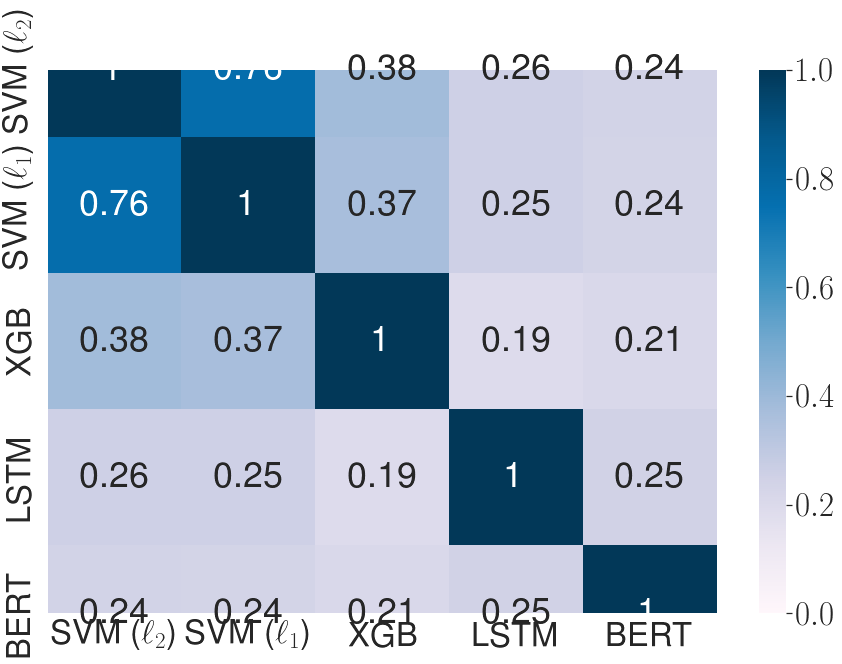

In [83]:
models = ['svm', 'svm_l1', 'xgb', 'lstm_att', 'bert']
simi.run_heatmap('yelp_binary', SAVE_YELP_DIR, models, ['built_in'], [10])

### Similarity comparison between models using the built-in method <a id='models'></a>
[Table of Content](#content)

=== deception ===


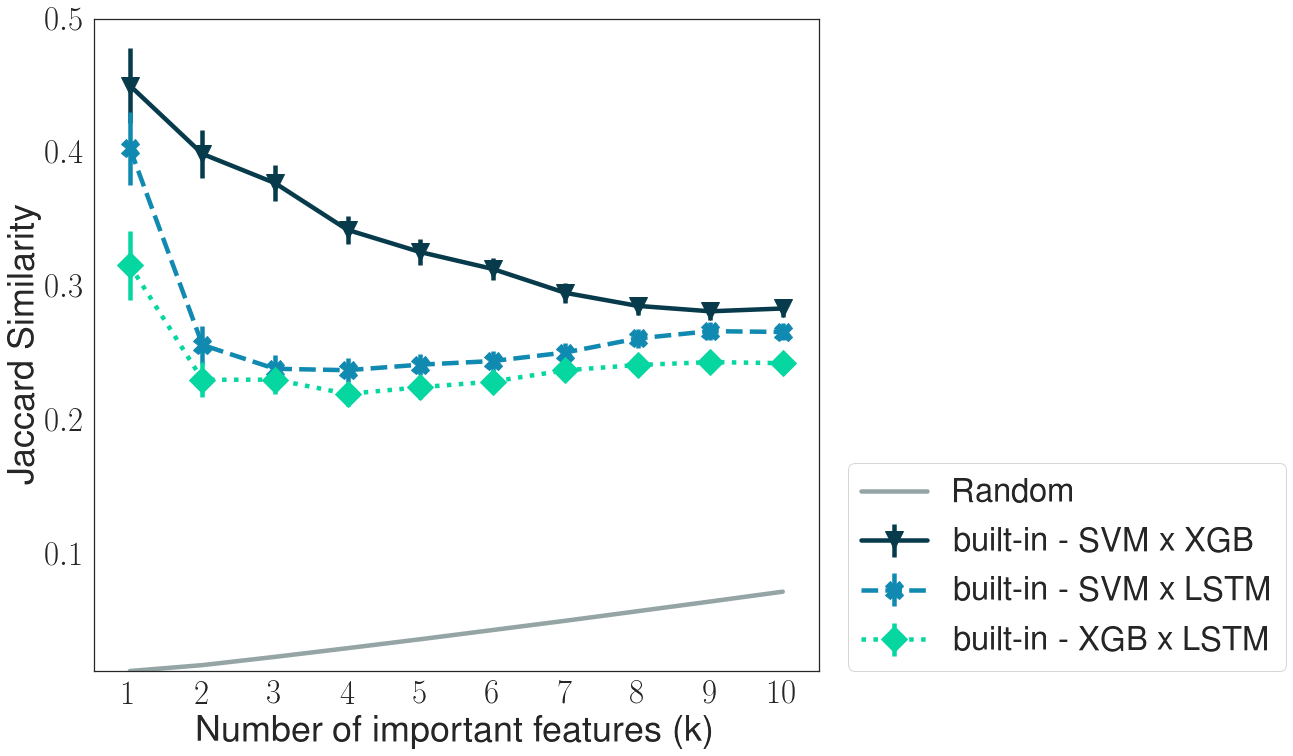

=== yelp binary ===


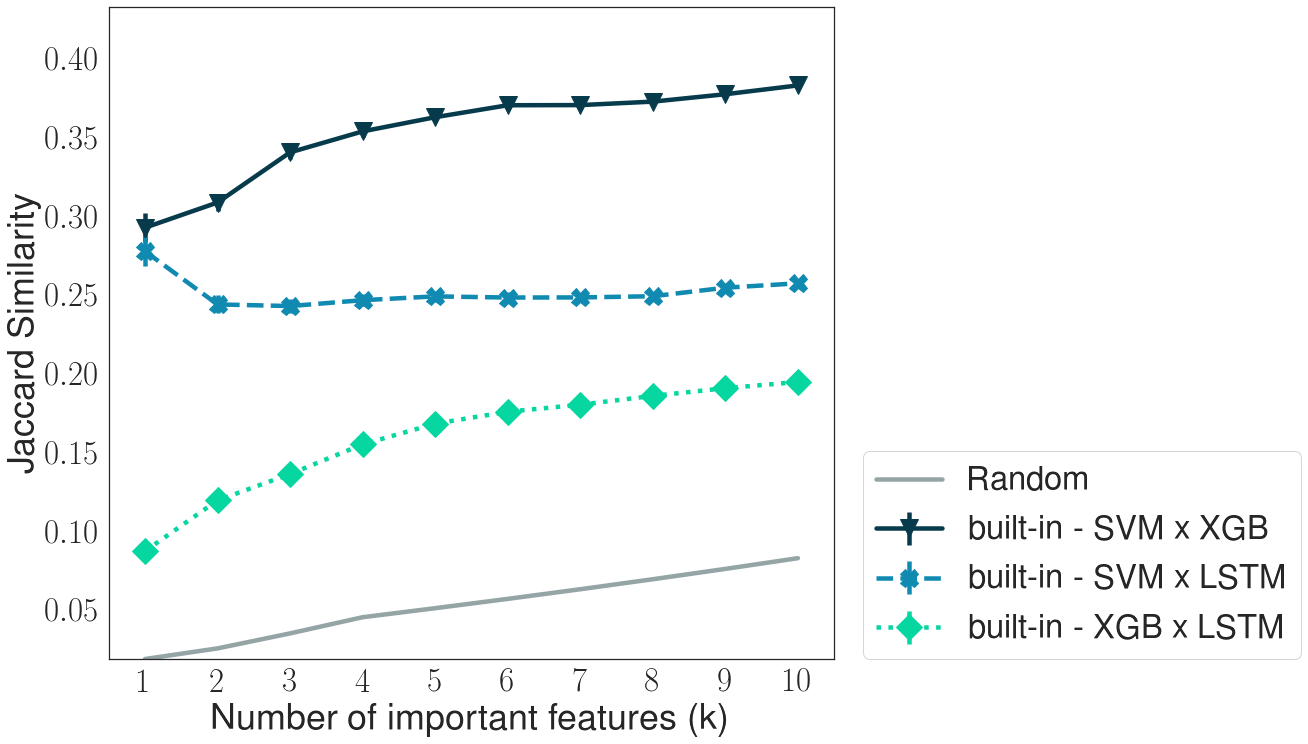

=== sst binary ===


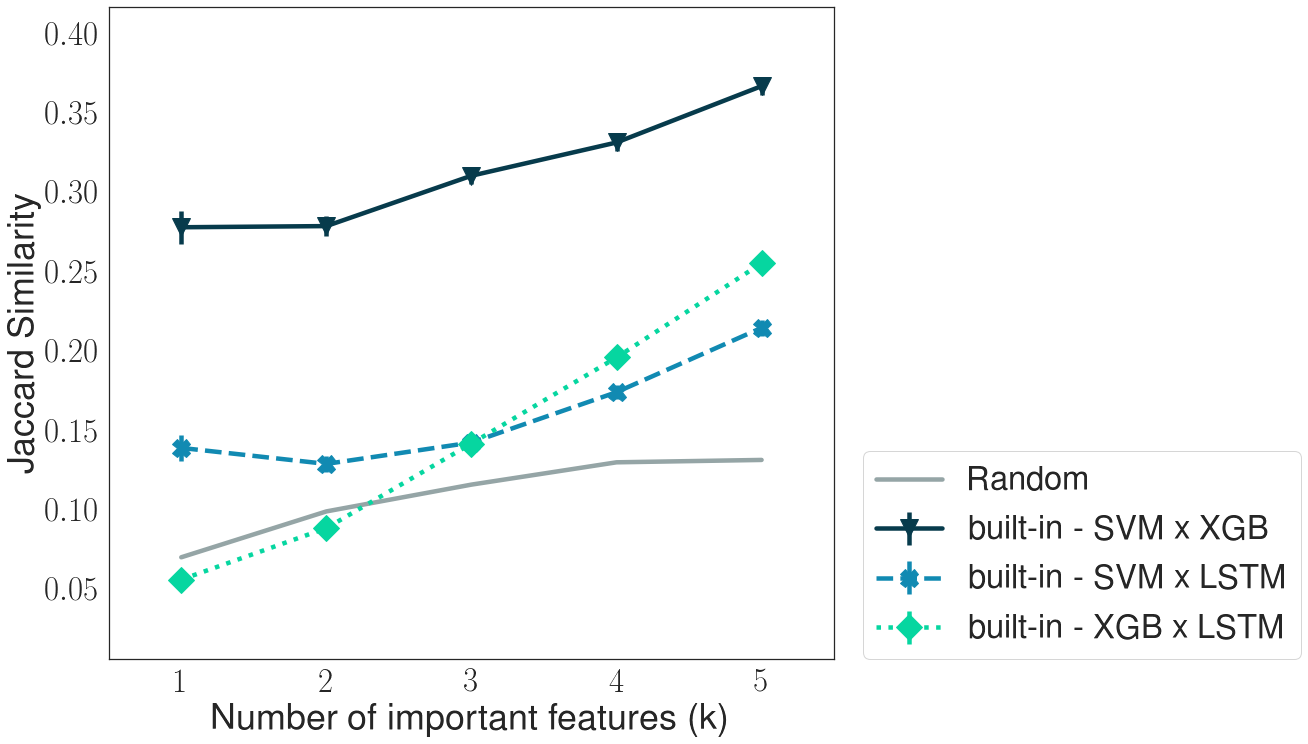

In [92]:
print('=== deception ===')
#simi.run_comp_btw_models('deception', SAVE_DECEPTION_DIR, k_10_list, ['svm', 'lstm_att'], ['built_in'])
simi.run_comp_btw_models('deception', SAVE_DECEPTION_DIR, k_10_list, ['svm_l1', 'bert'], ['built_in'])
print('=== yelp binary ===')
#simi.run_comp_btw_models('yelp_binary', SAVE_YELP_DIR, k_10_list, ['svm', 'lstm_att'], ['built_in'])
simi.run_comp_btw_models('yelp_binary', SAVE_YELP_DIR, k_10_list, ['svm_l1', 'bert'], ['built_in'])
print('=== sst binary ===')
#simi.run_comp_btw_models('sst_binary', SAVE_SST_DIR, k_5_list, ['svm', 'lstm_att'], ['built_in'])
simi.run_comp_btw_models('sst_binary', SAVE_SST_DIR, k_5_list, ['svm_l1', 'bert'], ['built_in'])

### Comparison between the built-in method and post-hoc methods <a id='builtin-posthoc'></a>
[Table of Content](#content)

=== deception ===


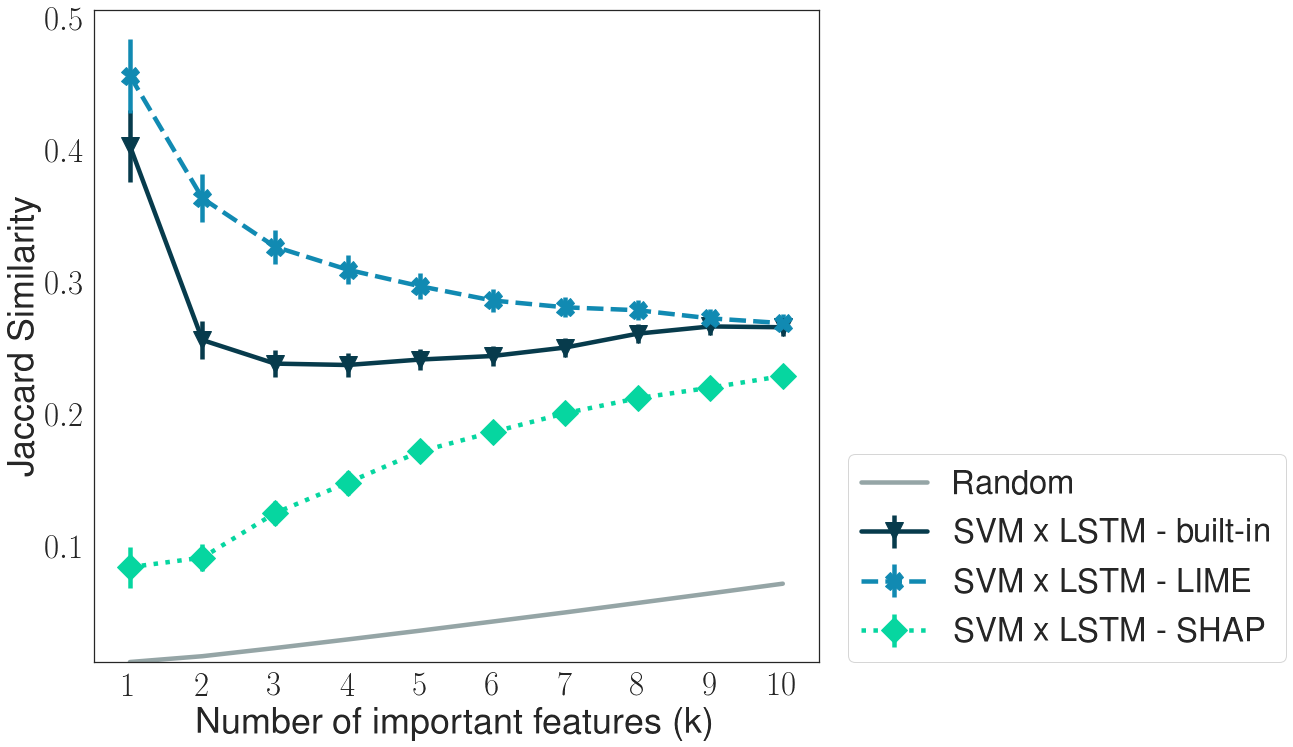

=== yelp binary ===


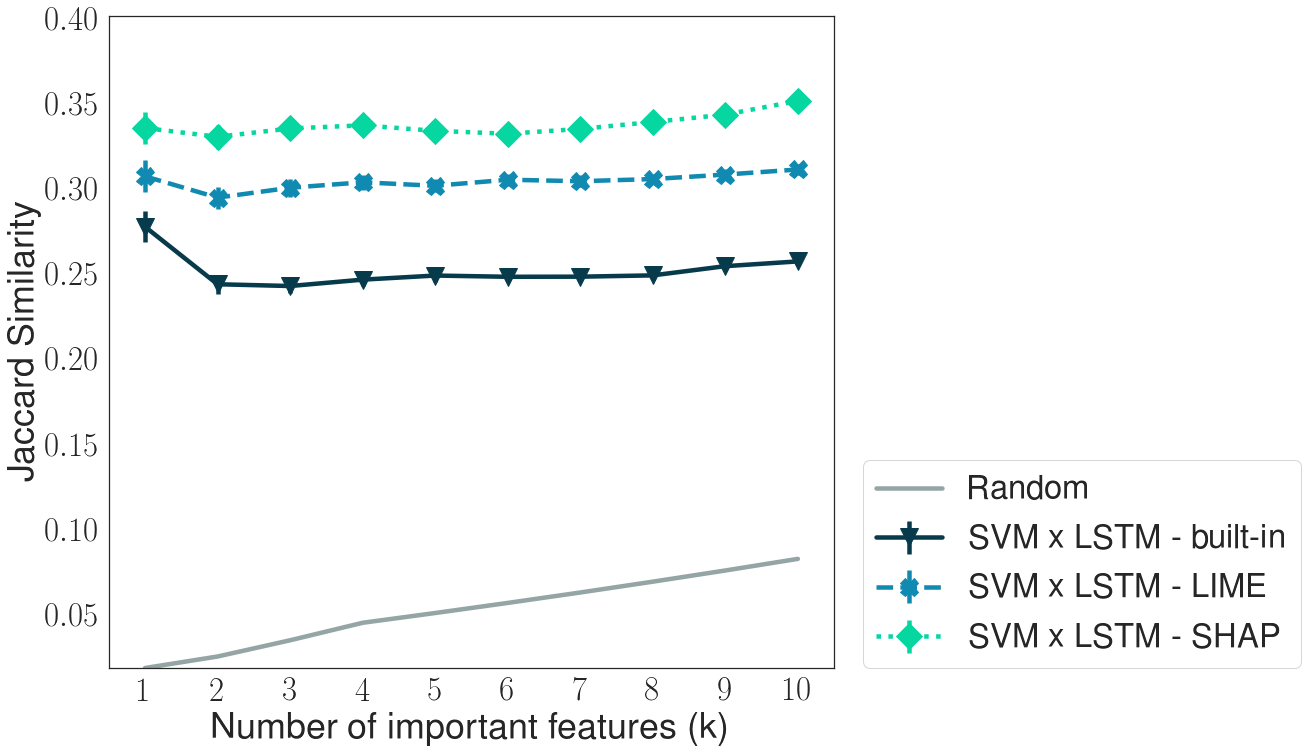

=== sst binary ===


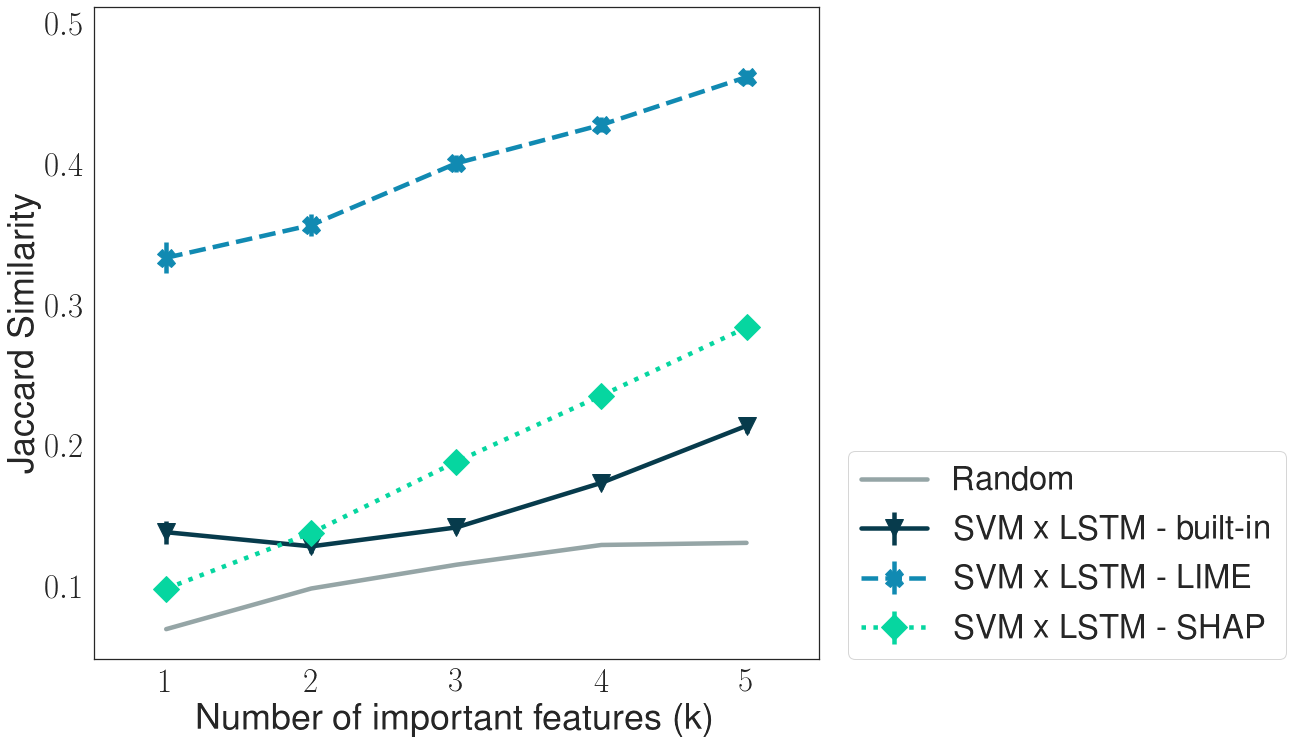

In [93]:
print('=== deception ===')
simi.run_comp_builtin_posthoc('deception', SAVE_DECEPTION_DIR, k_10_list, ['svm', 'lstm_att'], feature_types)
print('=== yelp binary ===')
simi.run_comp_builtin_posthoc('yelp_binary', SAVE_YELP_DIR, k_10_list, ['svm', 'lstm_att'], feature_types)
print('=== sst binary ===')
simi.run_comp_builtin_posthoc('sst_binary', SAVE_SST_DIR, k_5_list, ['svm', 'lstm_att'], feature_types)

### Similarity comparison between methods using the same model <a id='methods'></a>
[Table of Content](#content)

=== deception ===


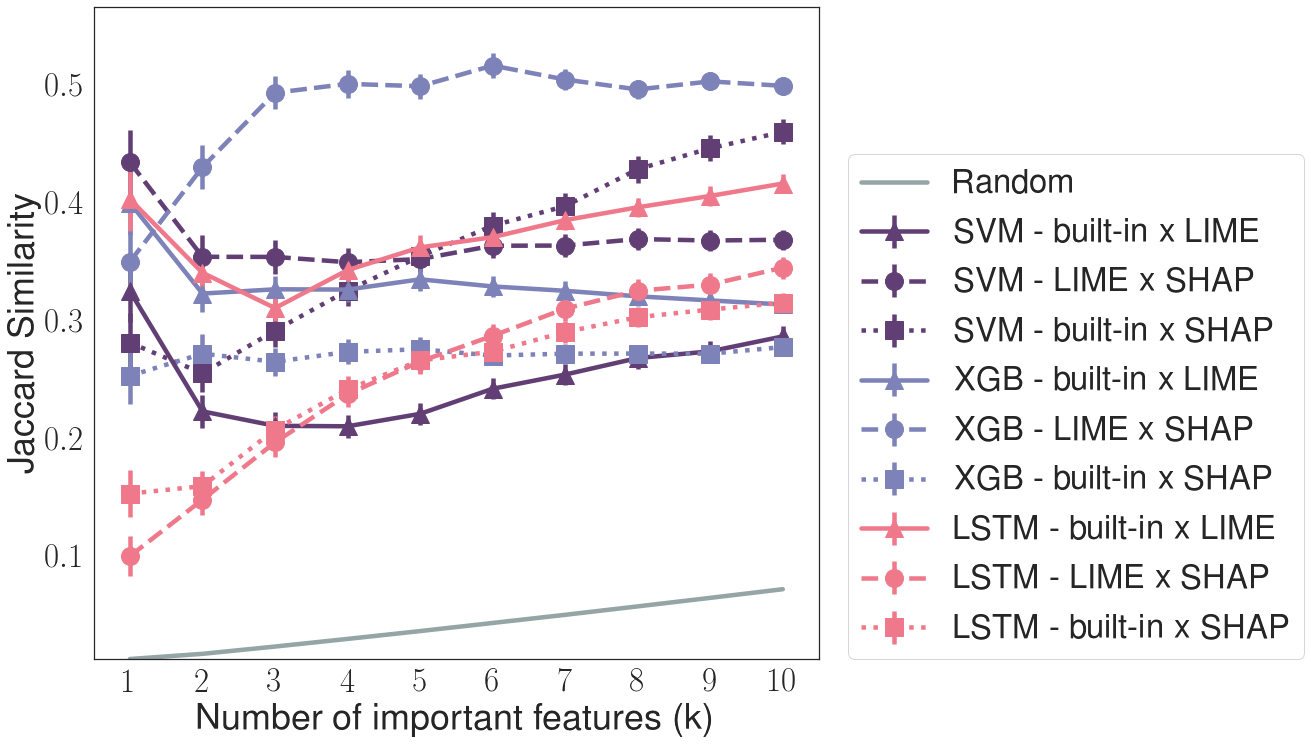

=== yelp binary ===


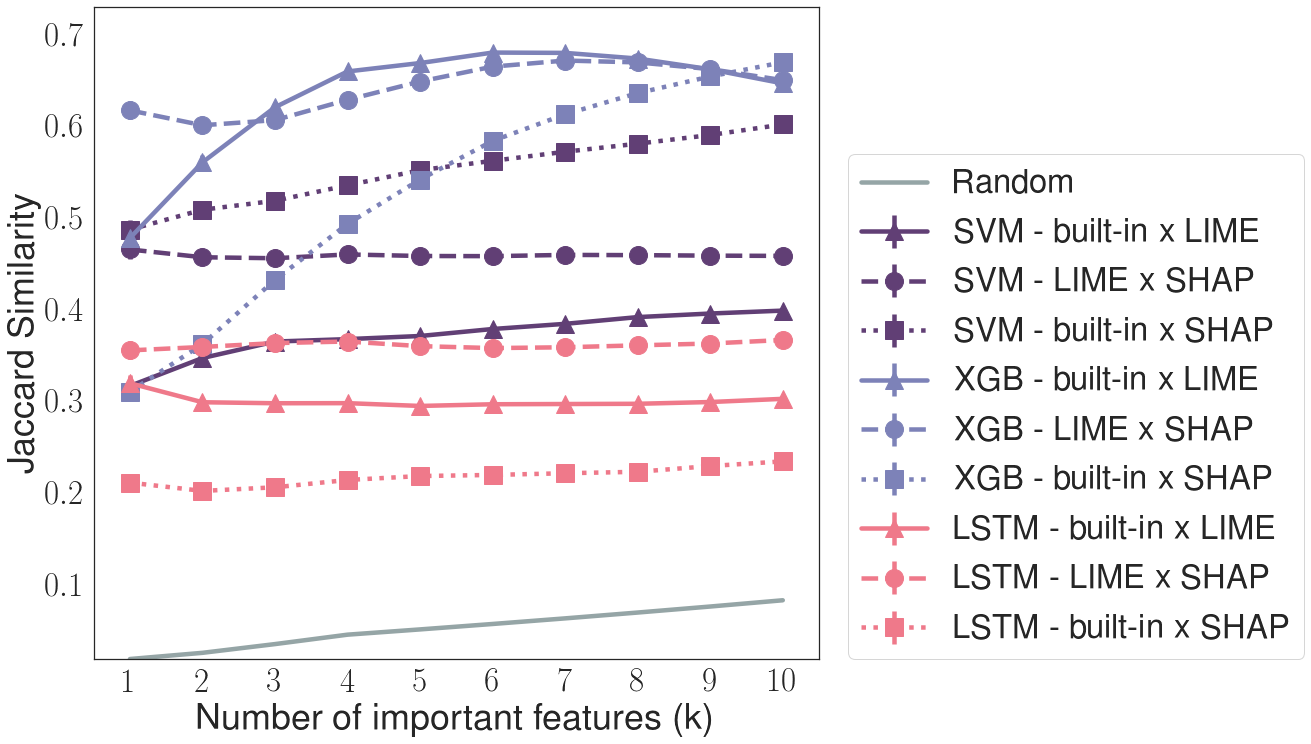

=== sst binary ===


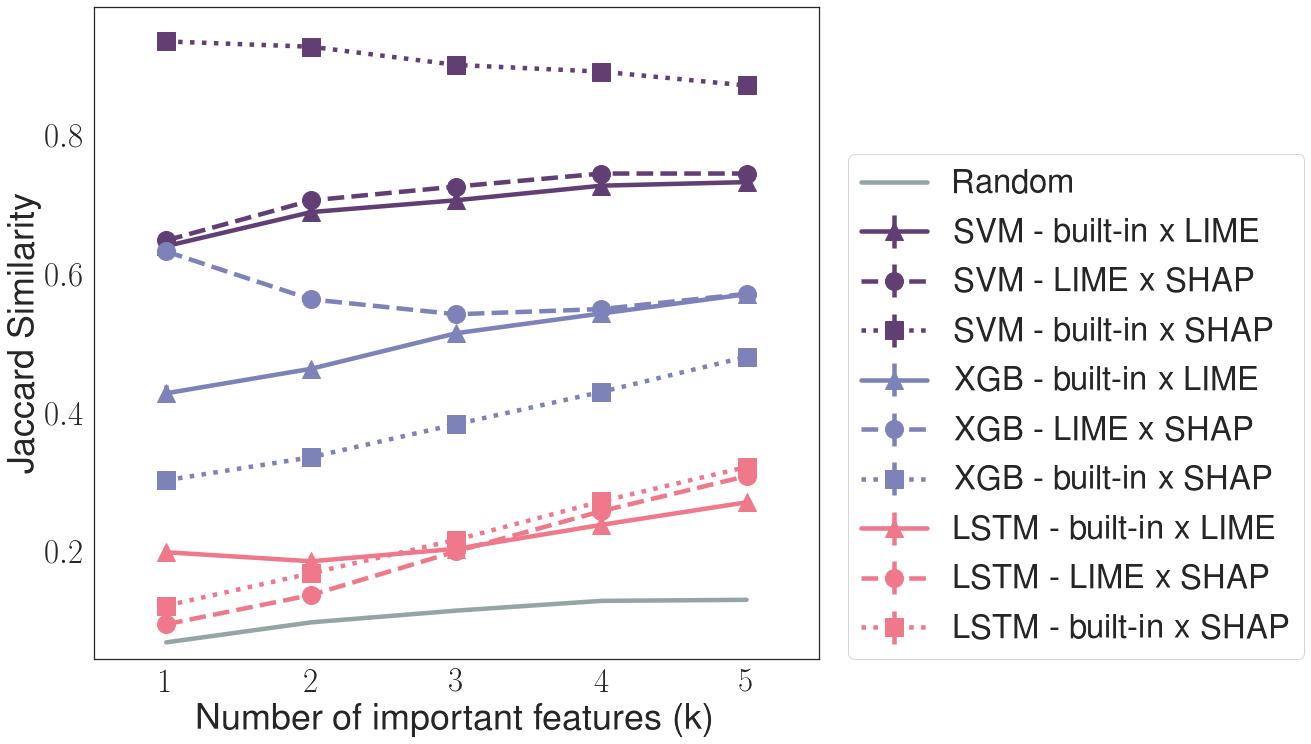

In [94]:
print('=== deception ===')
simi.run_comp_btw_methods('deception', SAVE_DECEPTION_DIR, k_10_list, models_1, feature_types)
print('=== yelp binary ===')
simi.run_comp_btw_methods('yelp_binary', SAVE_YELP_DIR, k_10_list, models_1, feature_types)
print('=== sst binary ===')
simi.run_comp_btw_methods('sst_binary', SAVE_SST_DIR, k_5_list, models_1, feature_types)

## Heterogeneity between Instances <a id='heterogeneity'></a>

### Similarity between two models with different methods <a id='predictions'></a>
[Table of Content](#content)

320it [00:01, 222.00it/s]


deception: svm vs. xgb


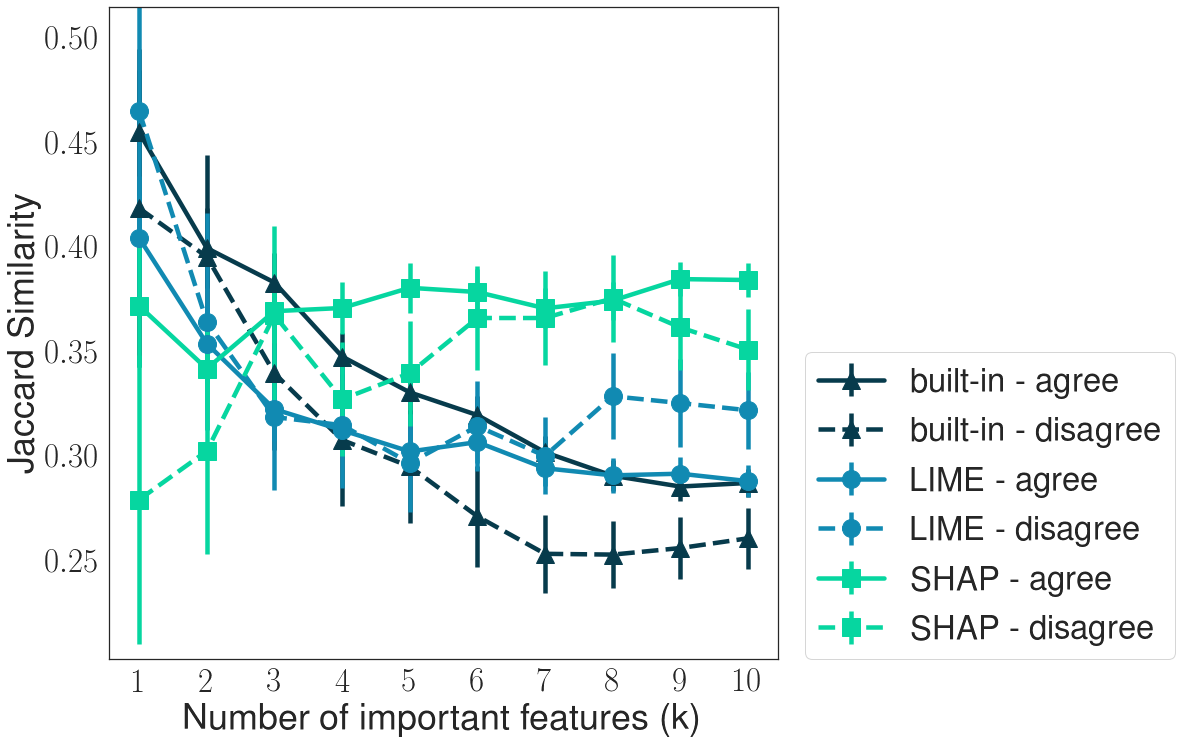

deception: xgb vs. lstm_att


320it [00:01, 228.17it/s]
320it [00:01, 221.78it/s]
320it [00:01, 225.08it/s]
320it [00:01, 231.24it/s]
320it [00:01, 229.62it/s]
320it [00:01, 227.09it/s]
320it [00:01, 228.41it/s]
320it [00:01, 228.86it/s]
320it [00:01, 224.82it/s]
320it [00:01, 222.64it/s]
320it [00:01, 230.73it/s]
320it [00:01, 226.72it/s]
320it [00:01, 227.37it/s]
320it [00:01, 228.20it/s]
320it [00:01, 233.15it/s]
320it [00:01, 229.79it/s]
320it [00:01, 232.17it/s]
320it [00:01, 228.71it/s]
320it [00:01, 229.04it/s]
320it [00:01, 230.01it/s]
320it [00:01, 228.74it/s]
320it [00:01, 228.77it/s]
320it [00:01, 227.86it/s]
320it [00:01, 225.63it/s]
320it [00:01, 204.37it/s]
320it [00:01, 201.26it/s]
320it [00:01, 233.90it/s]
320it [00:01, 233.90it/s]
320it [00:01, 195.96it/s]
320it [00:01, 199.06it/s]


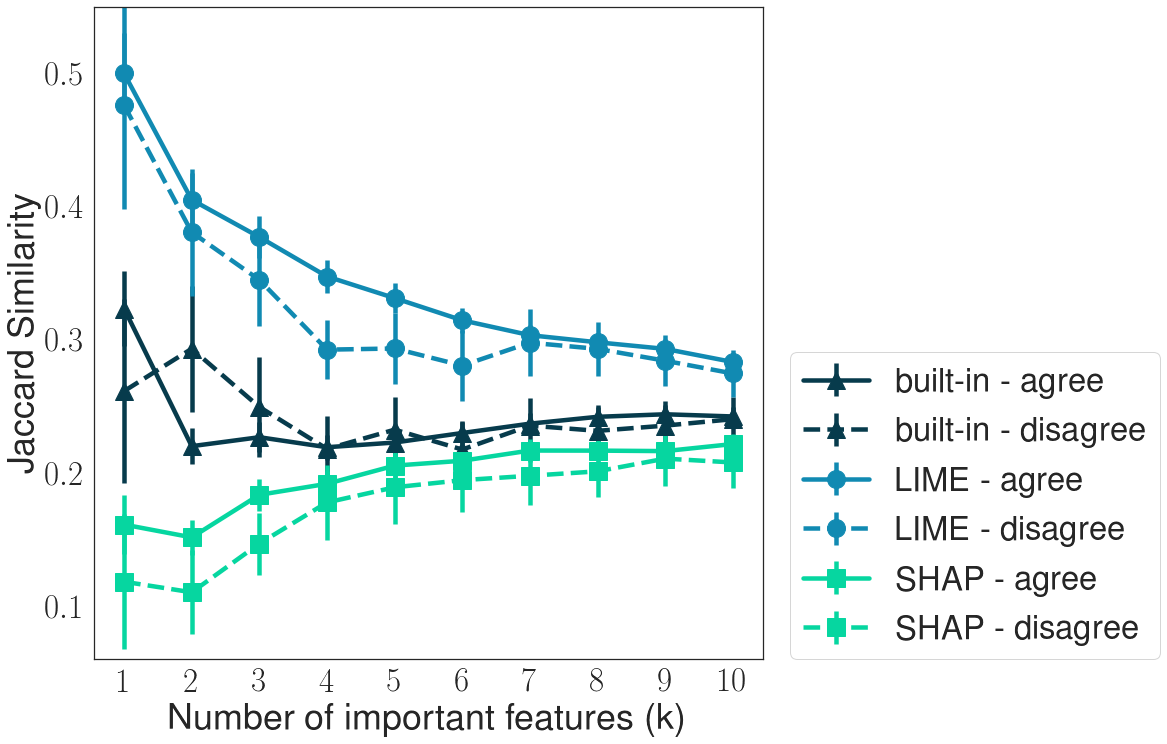

deception: svm vs. lstm_att


320it [00:01, 196.35it/s]
320it [00:01, 200.69it/s]
320it [00:01, 196.86it/s]
320it [00:01, 195.60it/s]
320it [00:01, 193.14it/s]
320it [00:01, 197.77it/s]
320it [00:01, 199.14it/s]
320it [00:01, 201.36it/s]
320it [00:01, 192.38it/s]
320it [00:01, 204.65it/s]
320it [00:01, 234.95it/s]
320it [00:01, 228.45it/s]
320it [00:01, 232.95it/s]
320it [00:01, 231.10it/s]
320it [00:01, 227.10it/s]
320it [00:01, 231.22it/s]
320it [00:01, 229.30it/s]
320it [00:01, 223.72it/s]
320it [00:01, 228.87it/s]
320it [00:01, 229.61it/s]
320it [00:01, 225.49it/s]
320it [00:01, 229.00it/s]
320it [00:01, 231.79it/s]
320it [00:01, 217.32it/s]
320it [00:01, 228.41it/s]
320it [00:01, 230.34it/s]
320it [00:01, 225.31it/s]
320it [00:01, 231.77it/s]
320it [00:01, 229.30it/s]
320it [00:01, 223.85it/s]


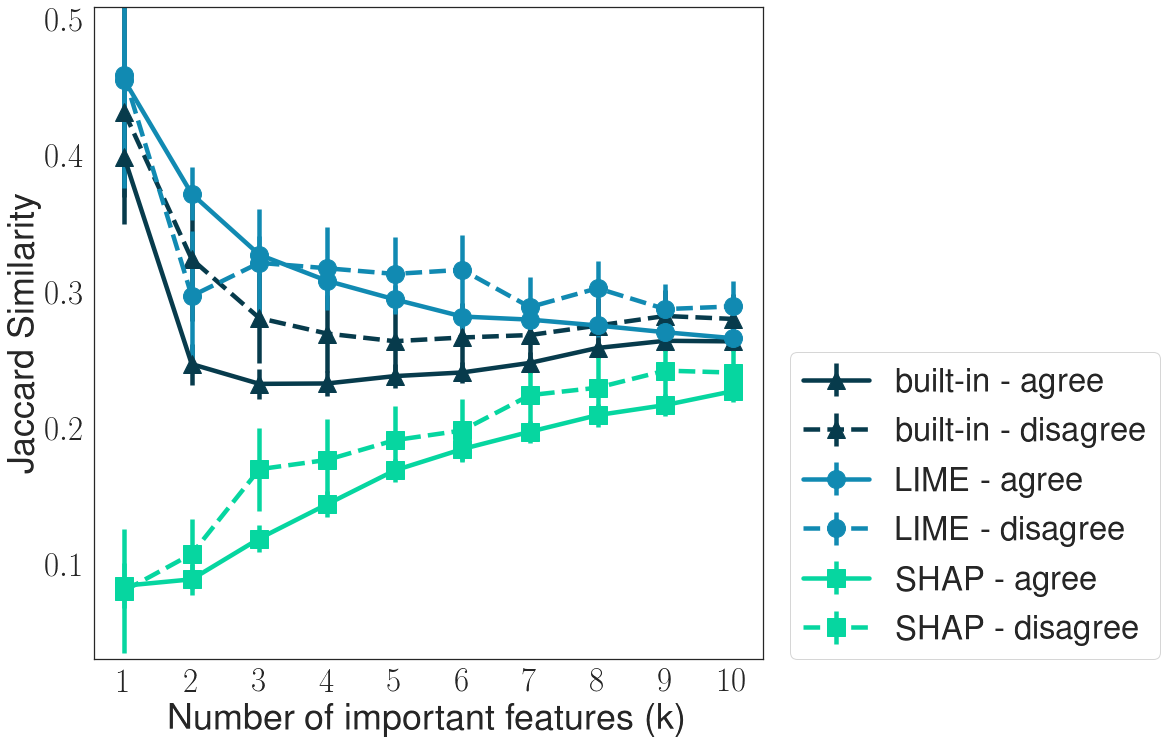

2400it [00:10, 231.49it/s]


yelp_binary: svm vs. xgb


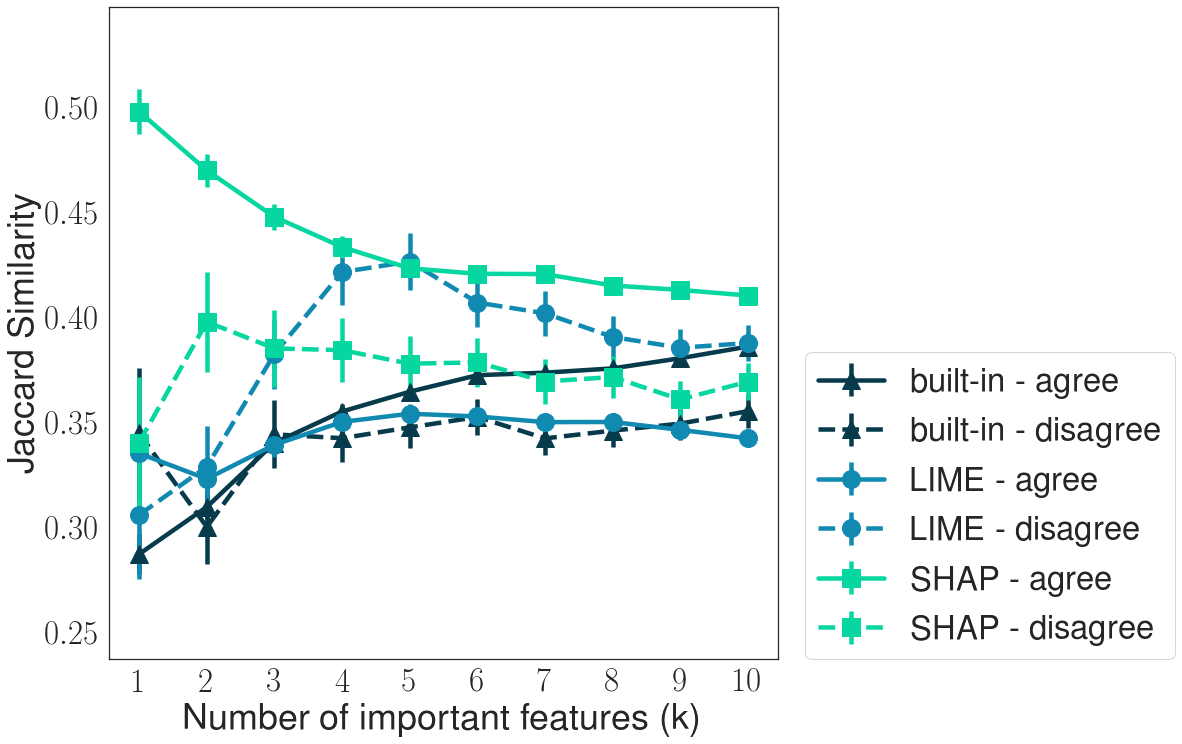

yelp_binary: xgb vs. lstm_att


2400it [00:10, 230.62it/s]
2400it [00:10, 230.42it/s]
2400it [00:10, 229.87it/s]
2400it [00:10, 229.76it/s]
2400it [00:10, 229.16it/s]
2400it [00:10, 230.36it/s]
2400it [00:10, 230.21it/s]
2400it [00:10, 231.29it/s]
2400it [00:10, 230.88it/s]
2400it [00:10, 231.08it/s]
2400it [00:10, 231.01it/s]
2400it [00:10, 229.74it/s]
2400it [00:10, 229.39it/s]
2400it [00:10, 230.39it/s]
2400it [00:10, 230.43it/s]
2400it [00:10, 229.87it/s]
2400it [00:10, 228.84it/s]
2400it [00:10, 229.93it/s]
2400it [00:10, 228.22it/s]
2400it [00:10, 229.06it/s]
2400it [00:10, 230.24it/s]
2400it [00:10, 230.37it/s]
2400it [00:10, 230.69it/s]
2400it [00:10, 230.51it/s]
2400it [00:10, 230.38it/s]
2400it [00:10, 229.90it/s]
2400it [00:10, 230.41it/s]
2400it [00:10, 230.26it/s]
2400it [00:10, 229.77it/s]
2400it [00:10, 229.07it/s]


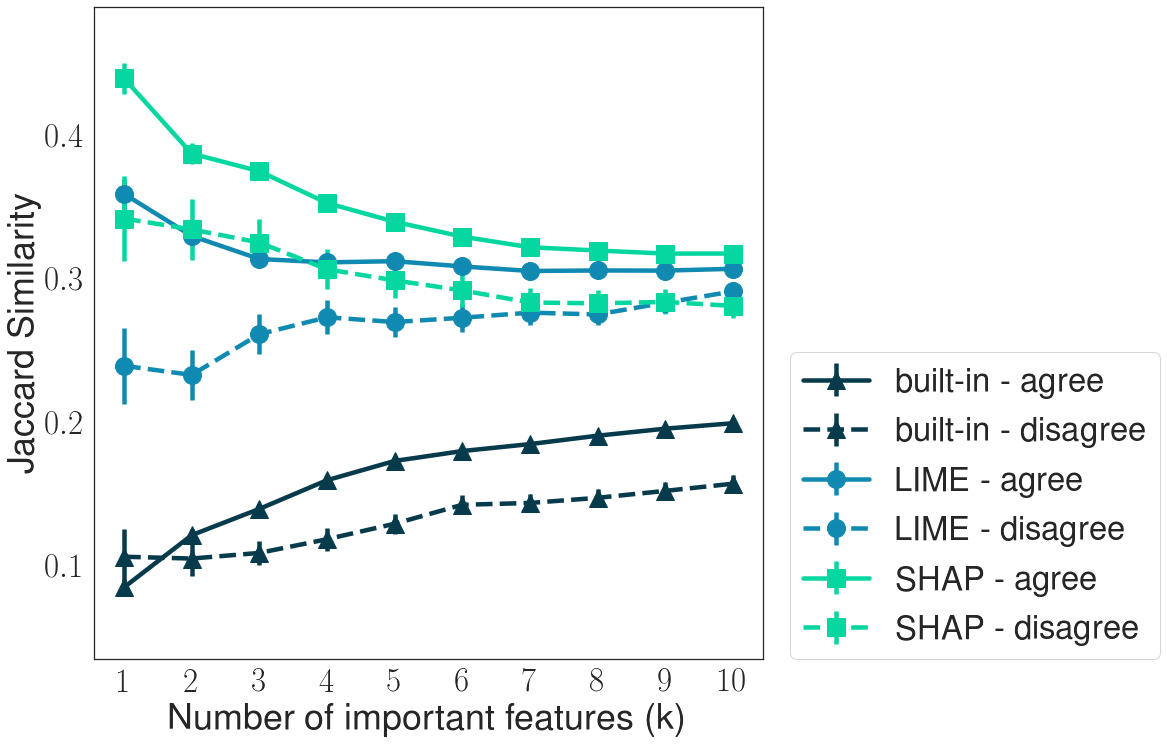

yelp_binary: svm vs. lstm_att


2400it [00:10, 228.63it/s]
2400it [00:10, 228.12it/s]
2400it [00:10, 230.55it/s]
2400it [00:10, 229.94it/s]
2400it [00:10, 229.76it/s]
2400it [00:10, 230.67it/s]
2400it [00:10, 230.49it/s]
2400it [00:10, 229.68it/s]
2400it [00:10, 229.97it/s]
2400it [00:10, 229.52it/s]
2400it [00:10, 229.60it/s]
2400it [00:10, 229.44it/s]
2400it [00:10, 229.77it/s]
2400it [00:10, 230.68it/s]
2400it [00:10, 225.38it/s]
2400it [00:10, 230.46it/s]
2400it [00:10, 230.33it/s]
2400it [00:10, 230.21it/s]
2400it [00:10, 230.42it/s]
2400it [00:10, 229.48it/s]
2400it [00:10, 230.07it/s]
2400it [00:10, 229.62it/s]
2400it [00:10, 224.12it/s]
2400it [00:10, 228.39it/s]
2400it [00:10, 229.74it/s]
2400it [00:10, 229.55it/s]
2400it [00:10, 229.97it/s]
2400it [00:10, 230.57it/s]
2400it [00:10, 230.26it/s]
2400it [00:10, 230.16it/s]


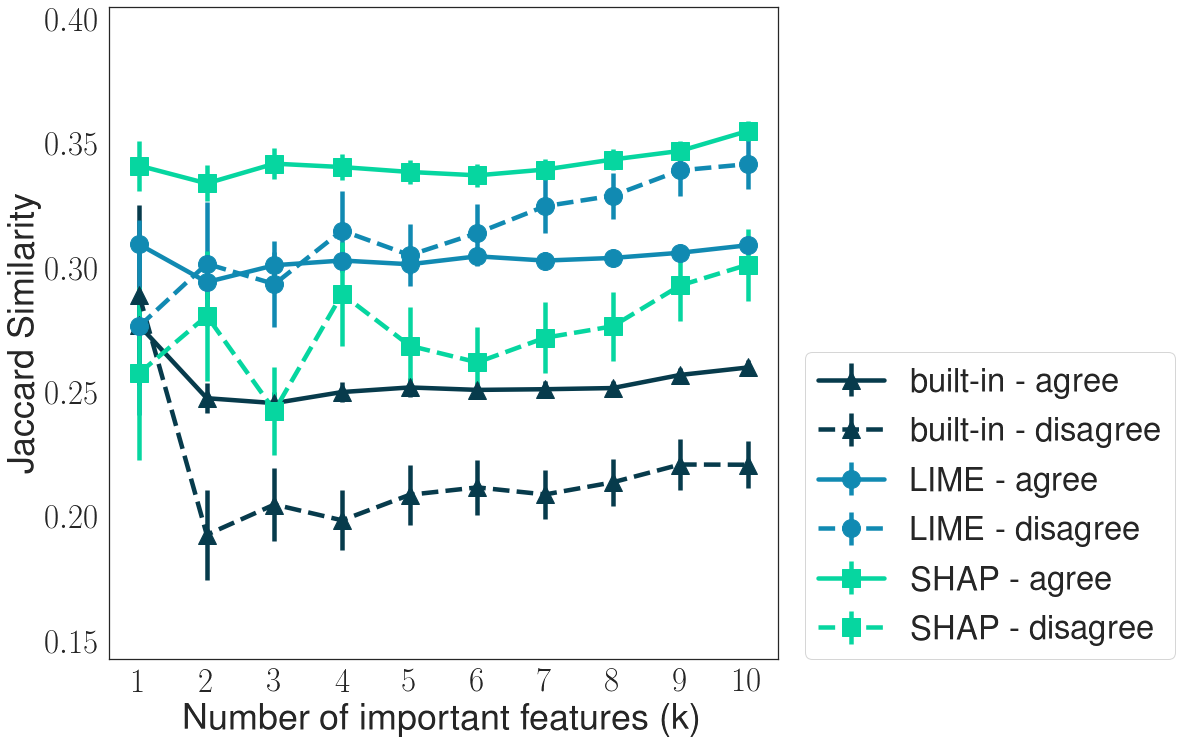

1821it [00:01, 922.67it/s]


sst_binary: svm vs. xgb


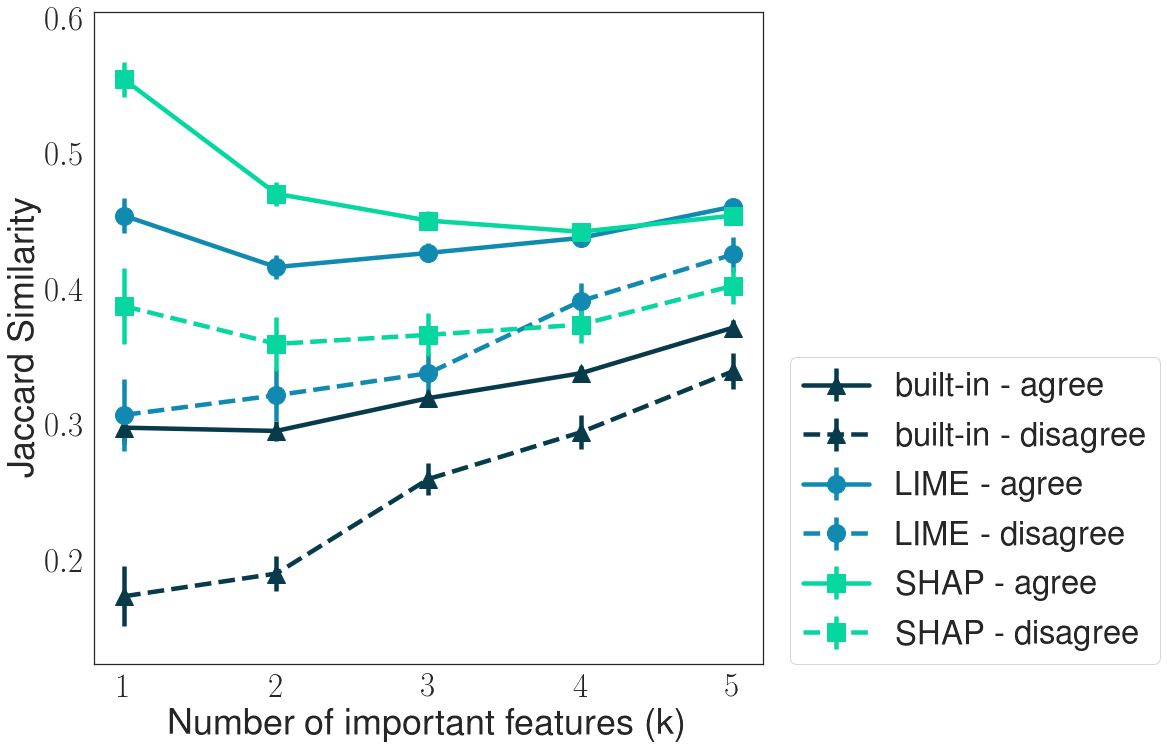

sst_binary: xgb vs. lstm_att


1821it [00:01, 932.92it/s]
1821it [00:01, 927.74it/s]
1821it [00:01, 926.78it/s]
1821it [00:01, 916.24it/s]
1821it [00:01, 928.59it/s]
1821it [00:01, 920.15it/s]
1821it [00:02, 885.36it/s]
1821it [00:01, 949.13it/s]
1821it [00:01, 933.23it/s]
1821it [00:01, 922.73it/s]
1821it [00:01, 914.29it/s]
1821it [00:01, 948.79it/s]
1821it [00:01, 926.52it/s]
1821it [00:01, 952.03it/s]
1821it [00:01, 942.42it/s]


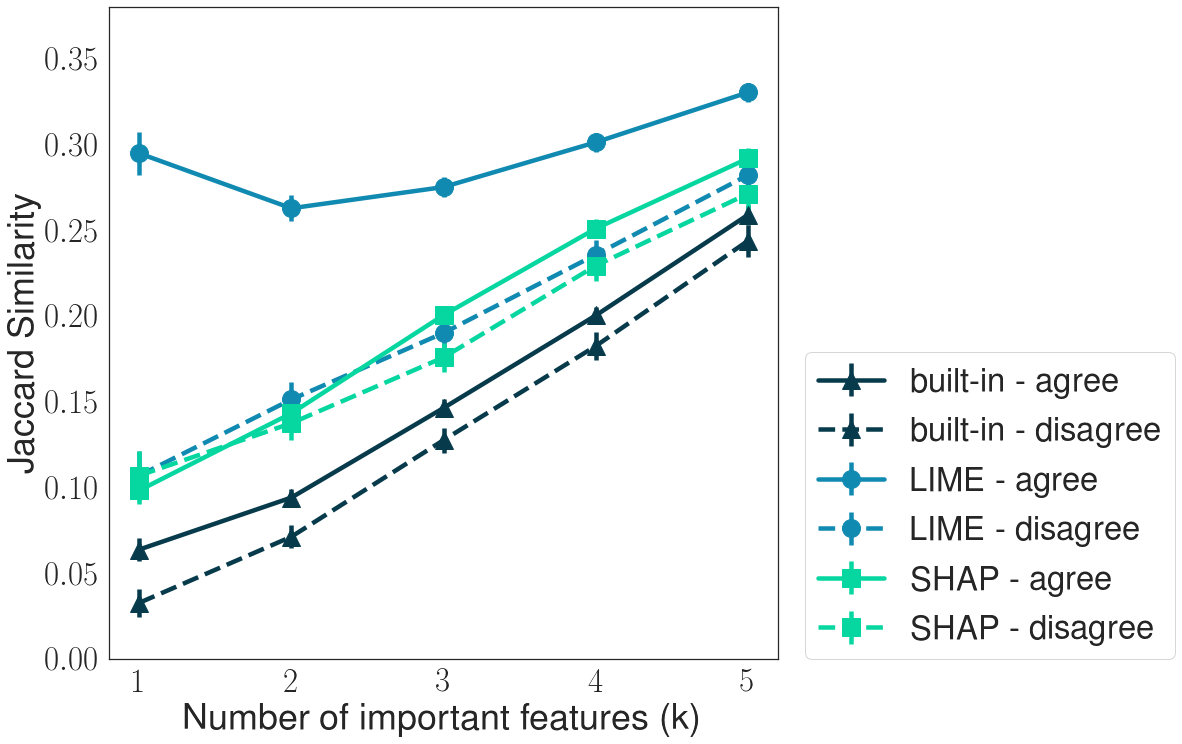

sst_binary: svm vs. lstm_att


1821it [00:01, 937.13it/s]
1821it [00:01, 945.16it/s]
1821it [00:01, 948.20it/s]
1821it [00:01, 950.32it/s]
1821it [00:01, 941.91it/s]
1821it [00:01, 950.26it/s]
1821it [00:01, 929.95it/s]
1821it [00:01, 946.92it/s]
1821it [00:01, 936.69it/s]
1821it [00:01, 927.94it/s]
1821it [00:01, 928.67it/s]
1821it [00:01, 918.80it/s]
1821it [00:01, 931.34it/s]
1821it [00:01, 940.09it/s]
1821it [00:01, 937.39it/s]


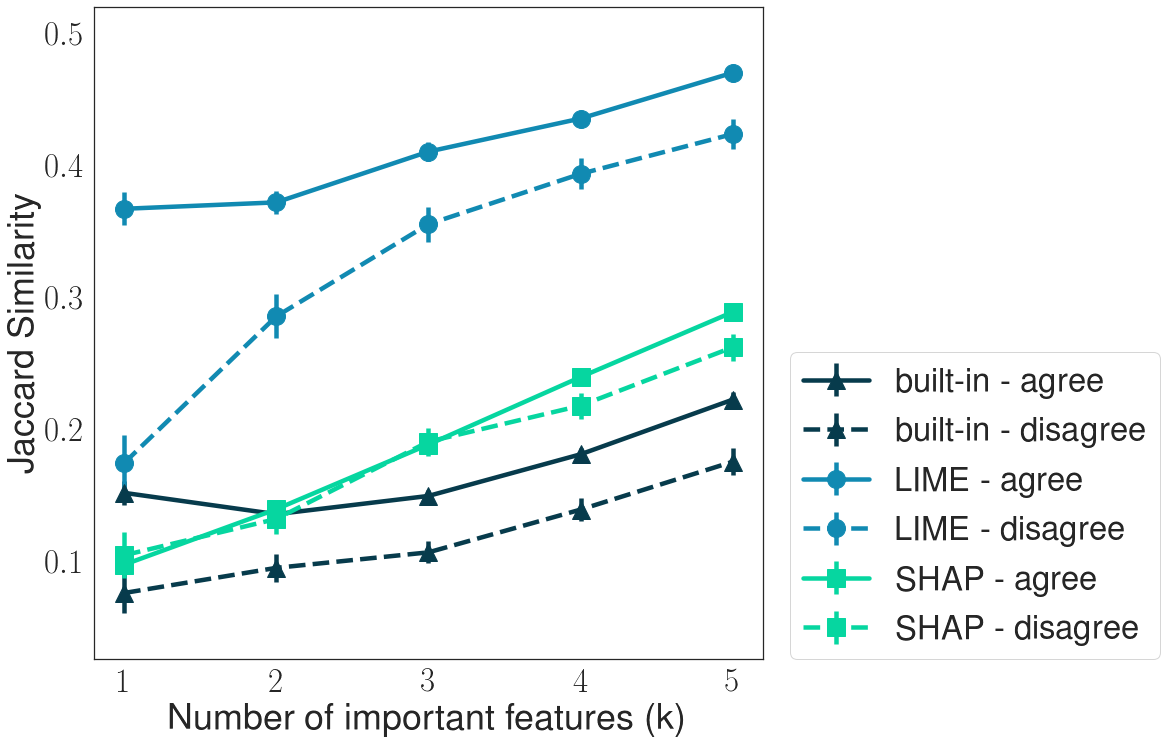

In [88]:
het.run_simi_pred('deception', SAVE_DECEPTION_DIR, models_1, k_10_list)
het.run_simi_pred('yelp_binary', SAVE_YELP_DIR, models_1, k_10_list)
het.run_simi_pred('sst_binary', SAVE_SST_DIR, models_1, k_5_list)

### Similarity comparison vs. length <a id='length'></a>
[Table of Content](#content)

=== deception ===


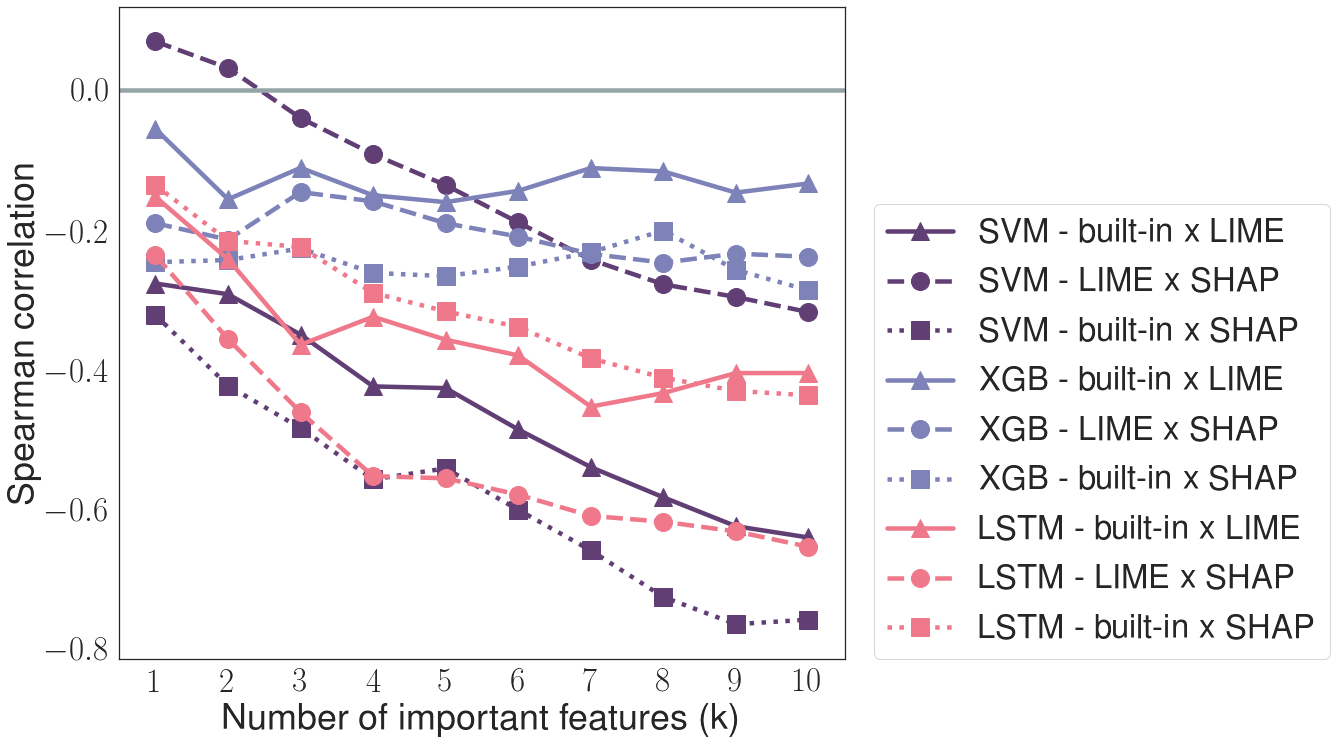

=== yelp binary ===


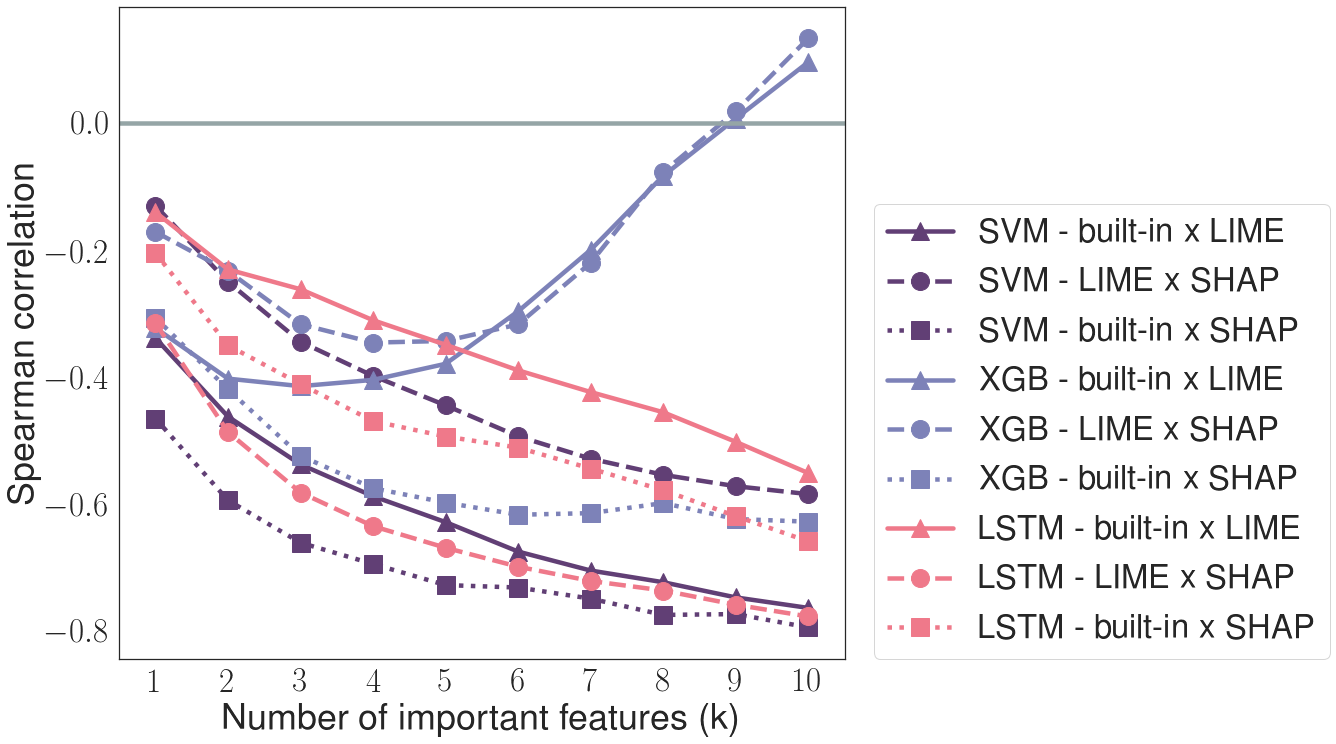

=== sst binary ===


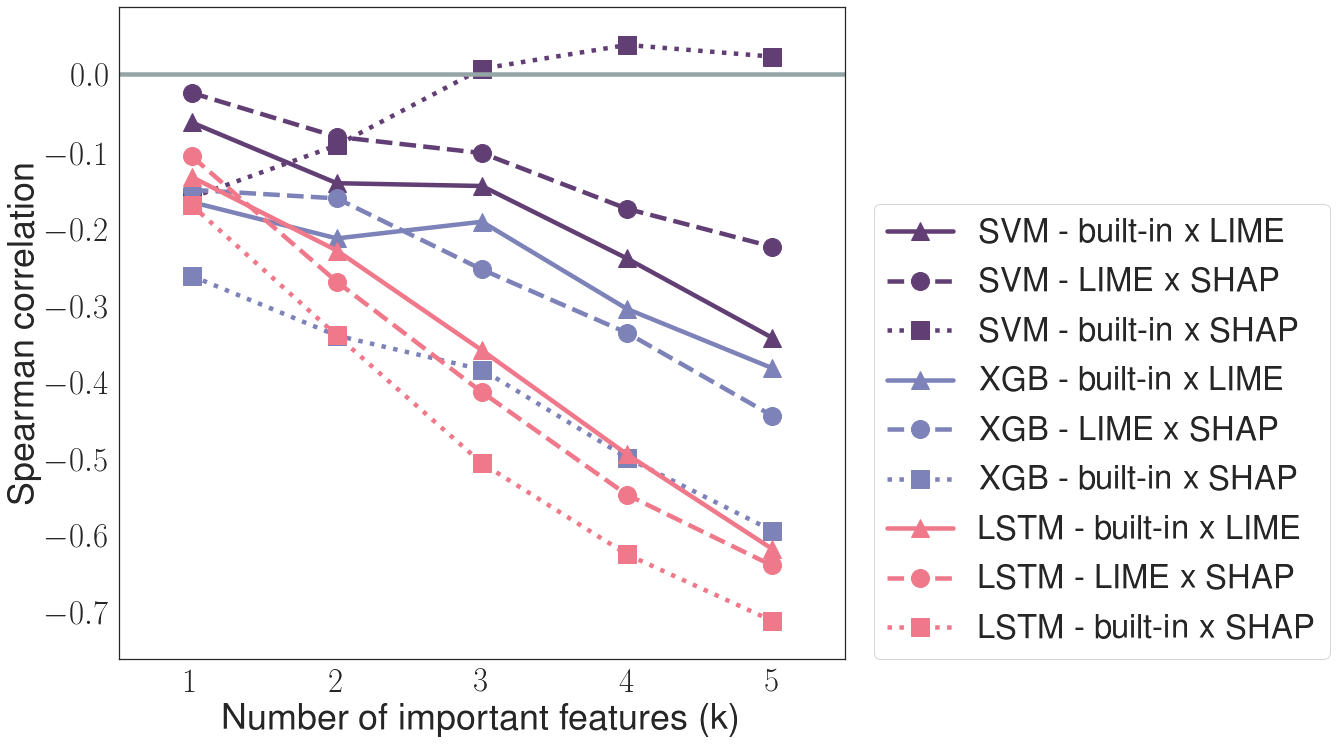

In [95]:
print('=== deception ===')
het.run_simi_length('deception', SAVE_DECEPTION_DIR, k_10_list, models_1, feature_types, '', 'len')
print('=== yelp binary ===')
het.run_simi_length('yelp_binary', SAVE_YELP_DIR, k_10_list, models_1, feature_types, '', 'len')
print('=== sst binary ===')
het.run_simi_length('sst_binary', SAVE_SST_DIR, k_5_list, models_1, feature_types, '', 'len')

### Comparison between models using the same method: similarity comparison vs. type-token ratio <a id='models-ratio'></a>
[Table of Content](#content)

=== deception ===


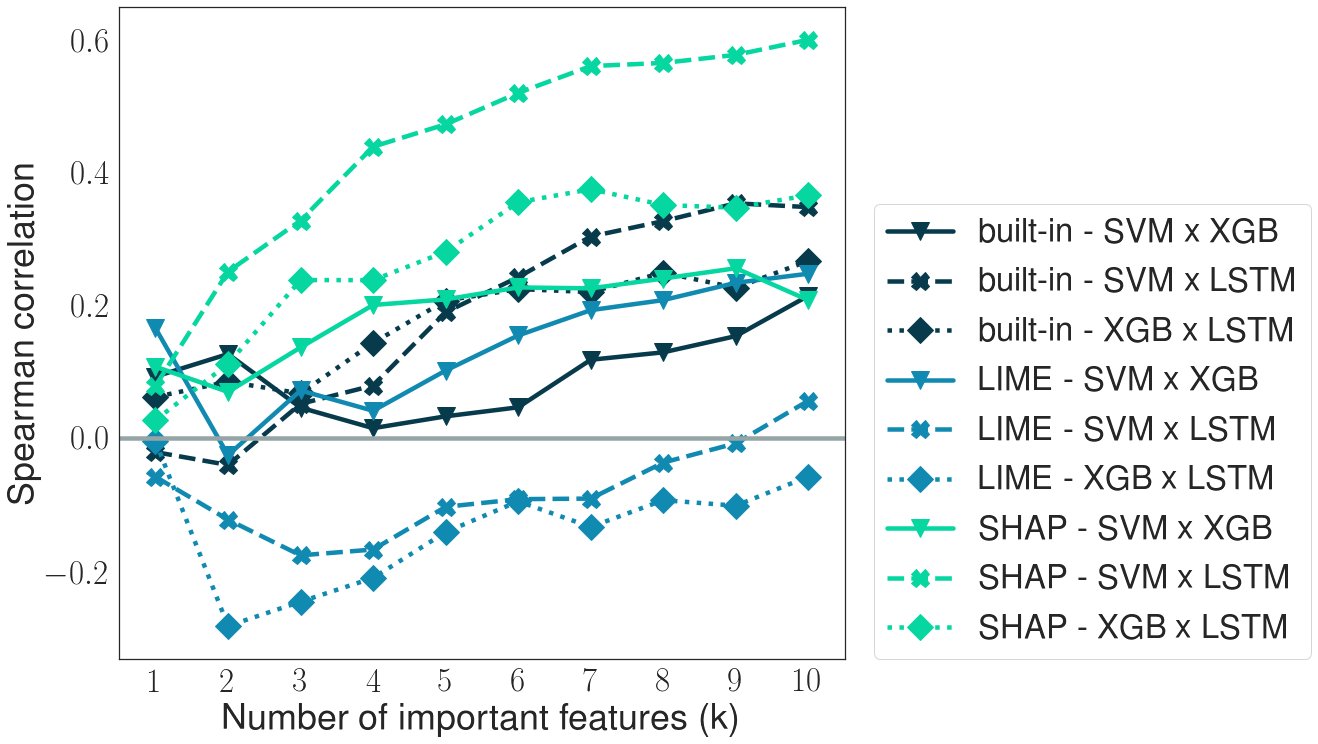

=== yelp binary ===


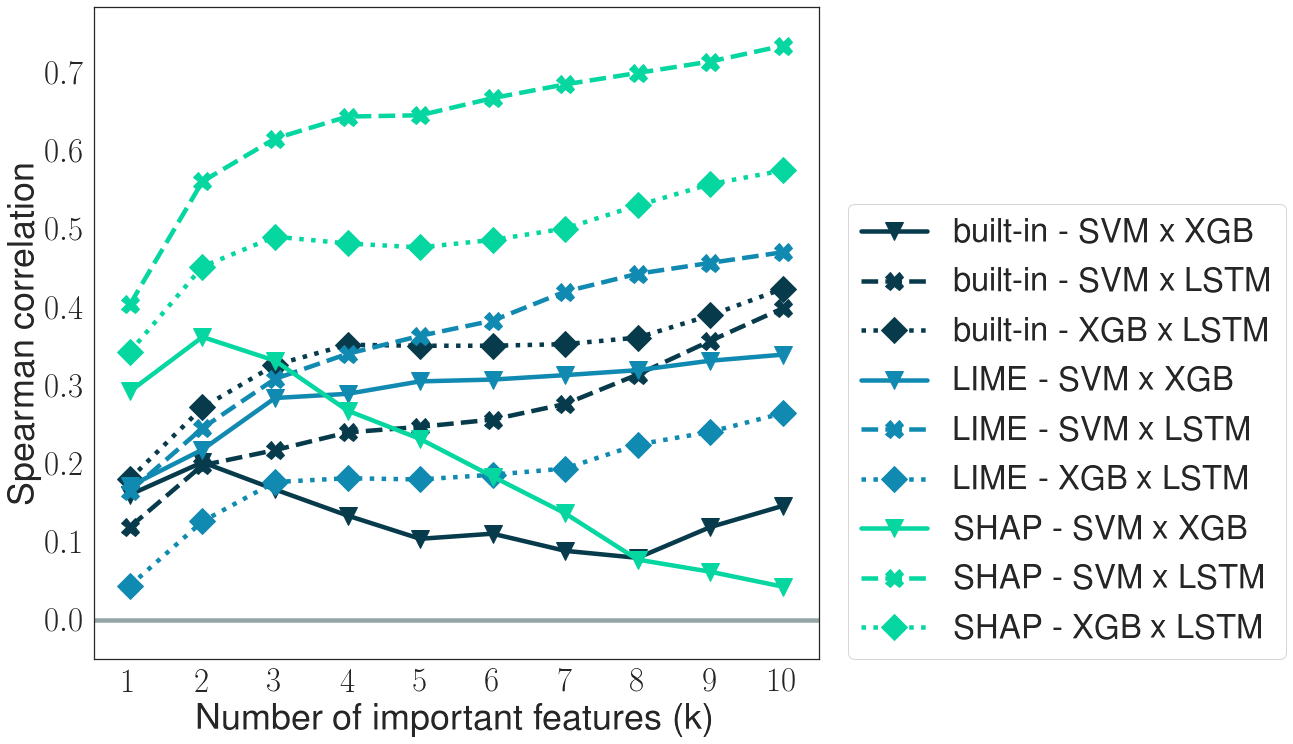

=== sst binary ===


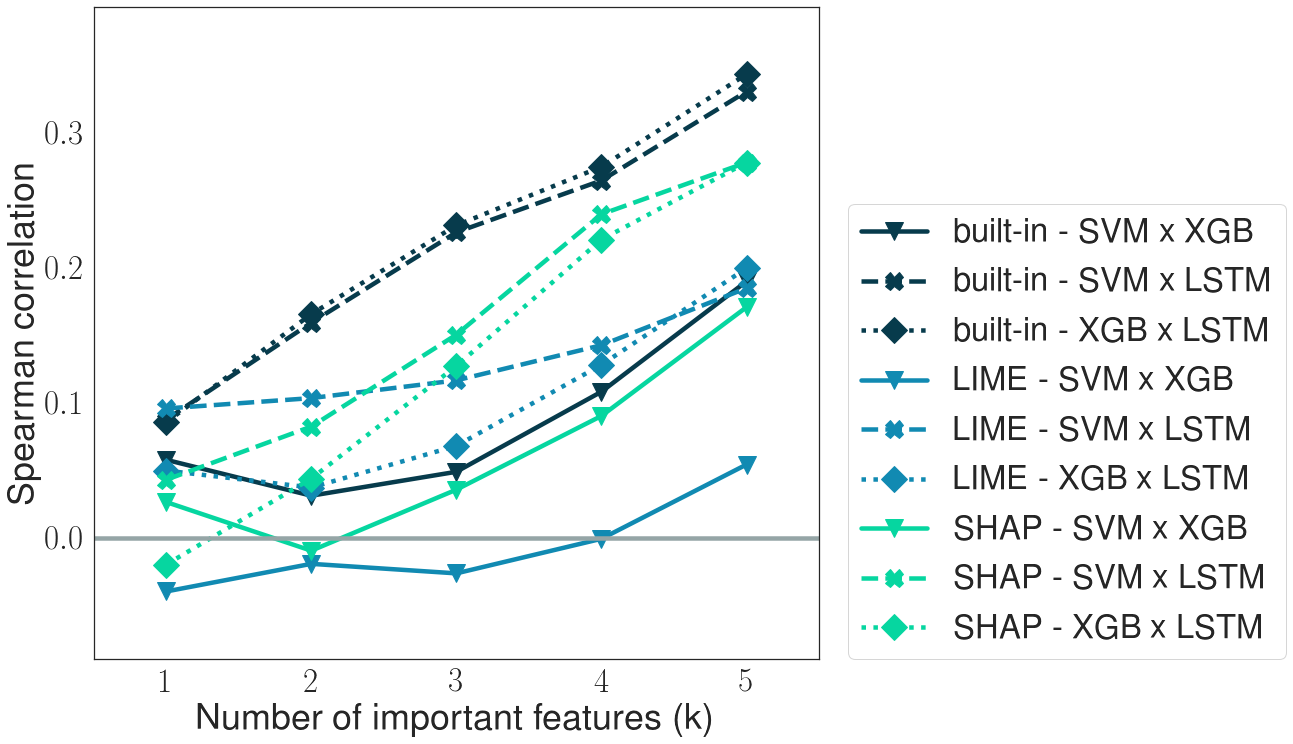

In [96]:
print('=== deception ===')
het.run_comp_models_type_token('deception', SAVE_DECEPTION_DIR, k_10_list, models_1, feature_types, '', 'ratio')
print('=== yelp binary ===')
het.run_comp_models_type_token('yelp_binary', SAVE_YELP_DIR, k_10_list, models_1, feature_types, '', 'ratio')
print('=== sst binary ===')
het.run_comp_models_type_token('sst_binary', SAVE_SST_DIR, k_5_list, models_1, feature_types, '', 'ratio')

### Comparison between methods using the same model: similarity comparison vs. type-token ratio <a id='methods-ratio'></a>
[Table of Content](#content)

=== deception ===


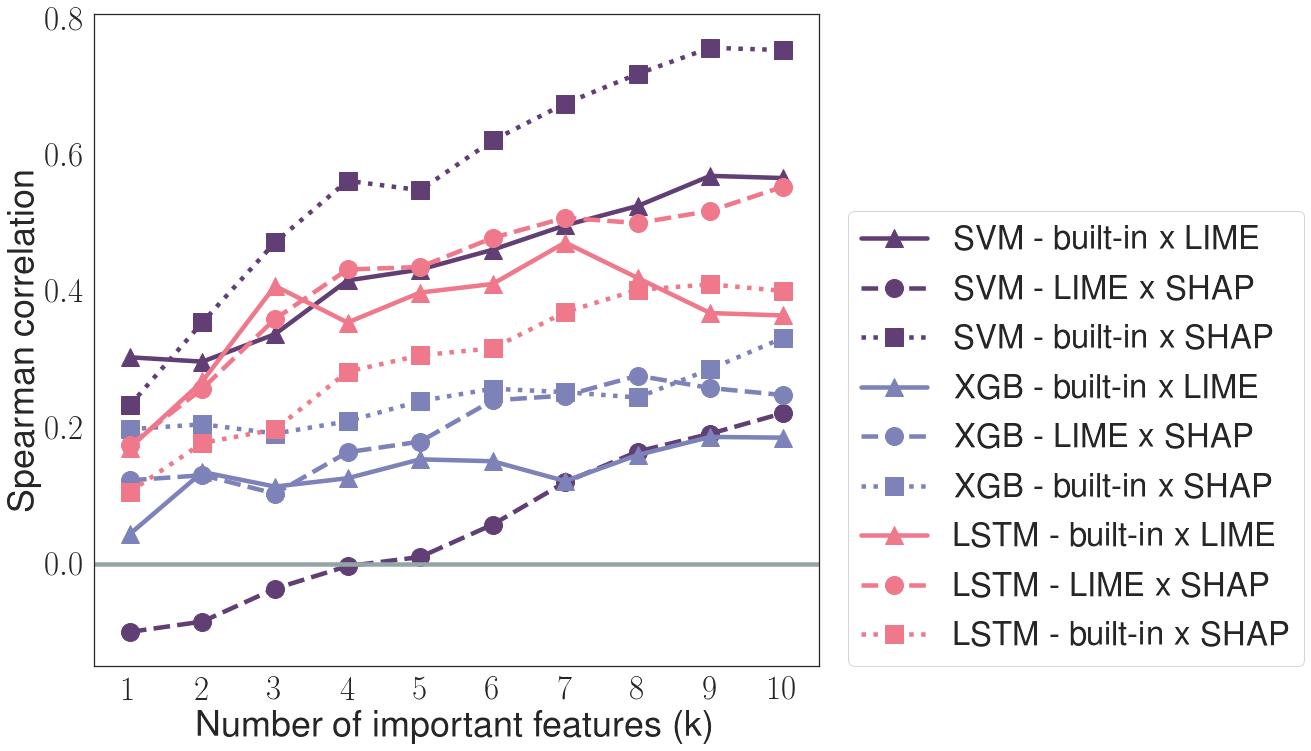

=== yelp binary ===


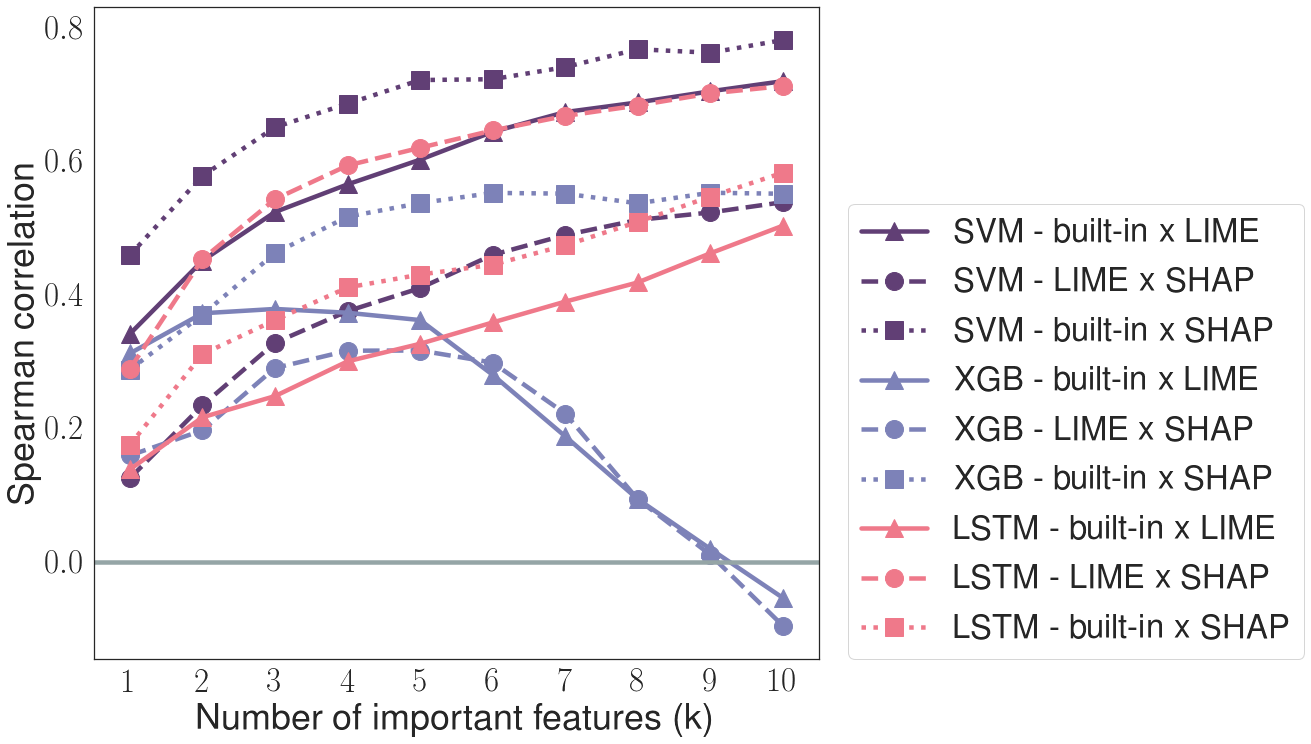

=== sst binary ===


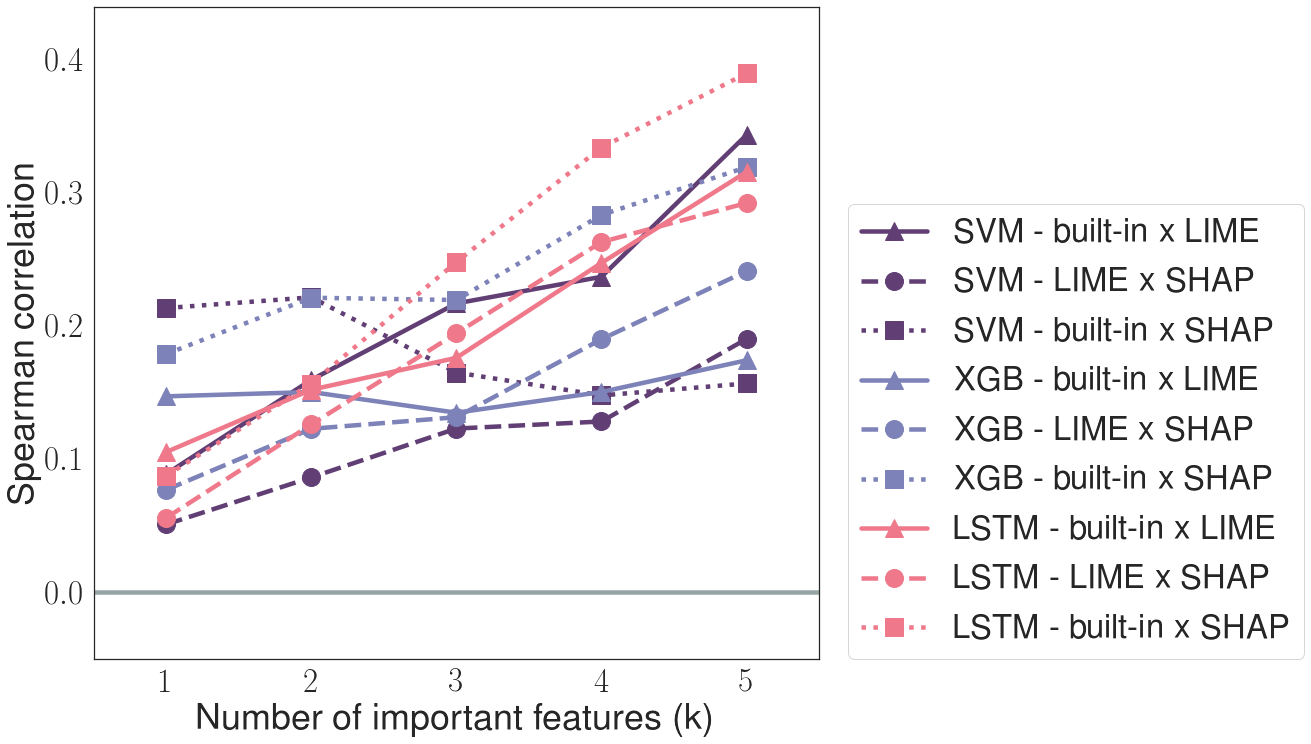

In [97]:
print('=== deception ===')
het.run_comp_methods_type_token('deception', SAVE_DECEPTION_DIR, k_10_list, models_1, feature_types, '', 'ratio')
print('=== yelp binary ===')
het.run_comp_methods_type_token('yelp_binary', SAVE_YELP_DIR, k_10_list, models_1, feature_types, '', 'ratio')
print('=== sst binary ===')
het.run_comp_methods_type_token('sst_binary', SAVE_SST_DIR, k_5_list, models_1, feature_types, '', 'ratio')

## Distribution of Important Features <a id='distribution'></a>

### The entropy of important features <a id='entropy'></a>
[Table of Content](#content)

=== deception ===


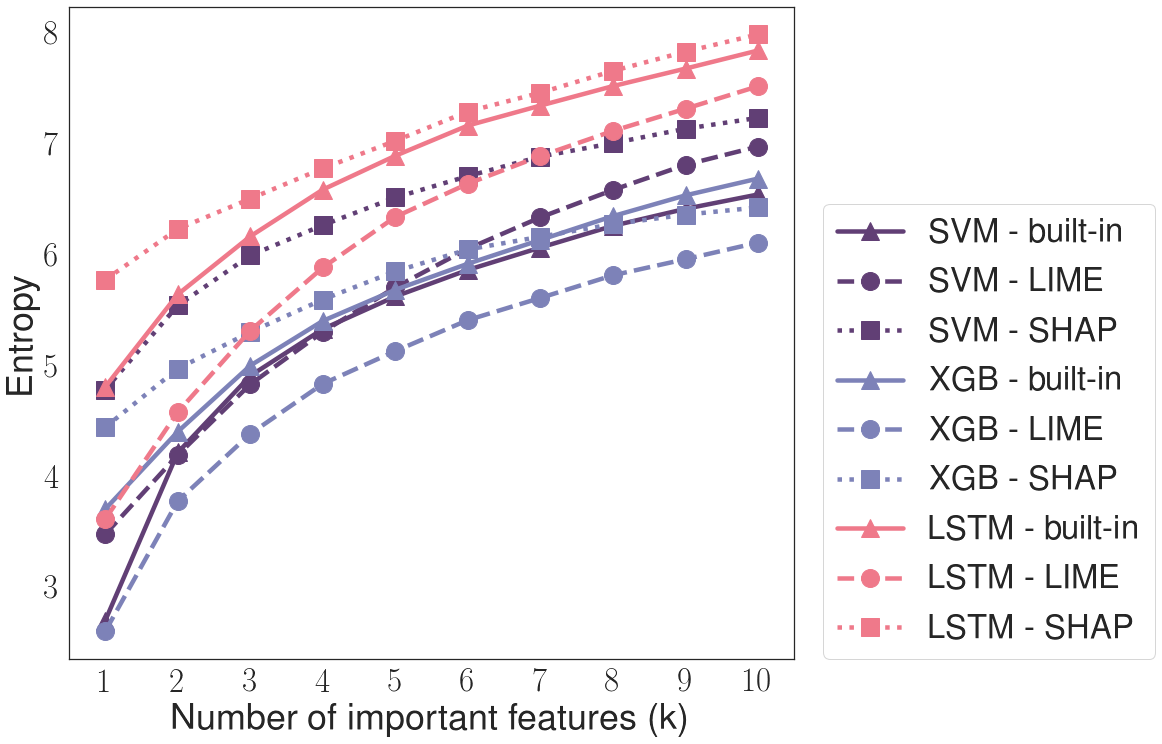

=== yelp binary ===


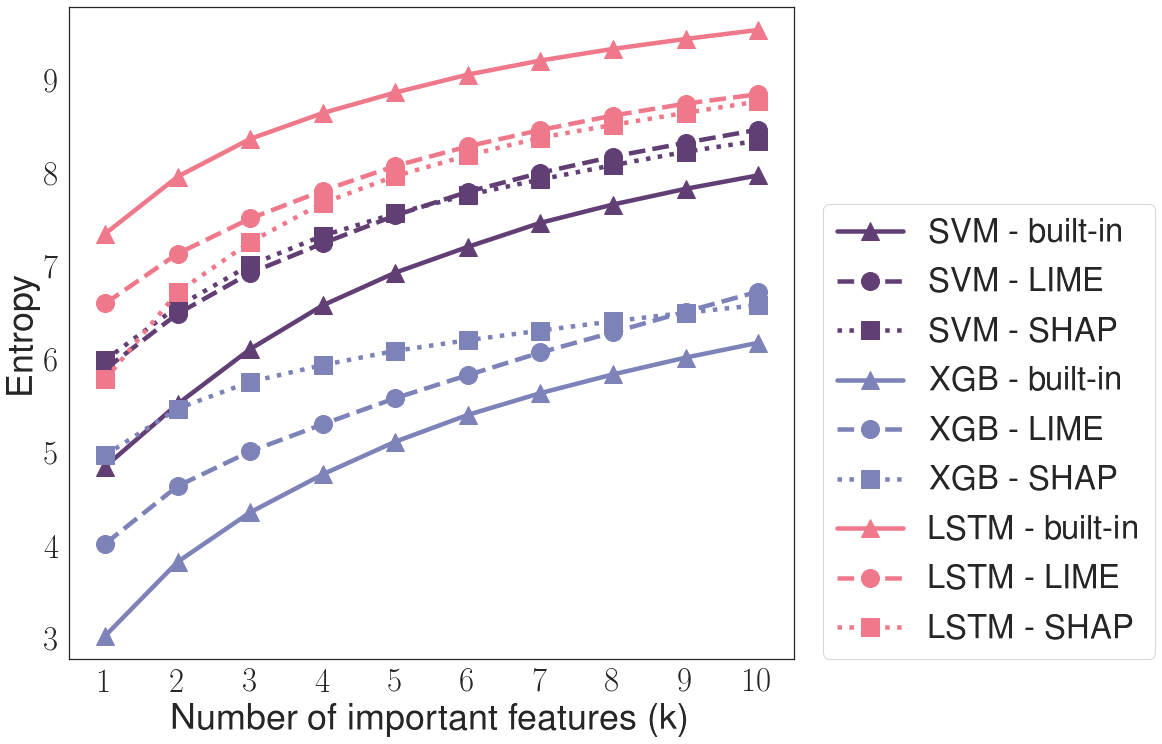

=== sst binary ===


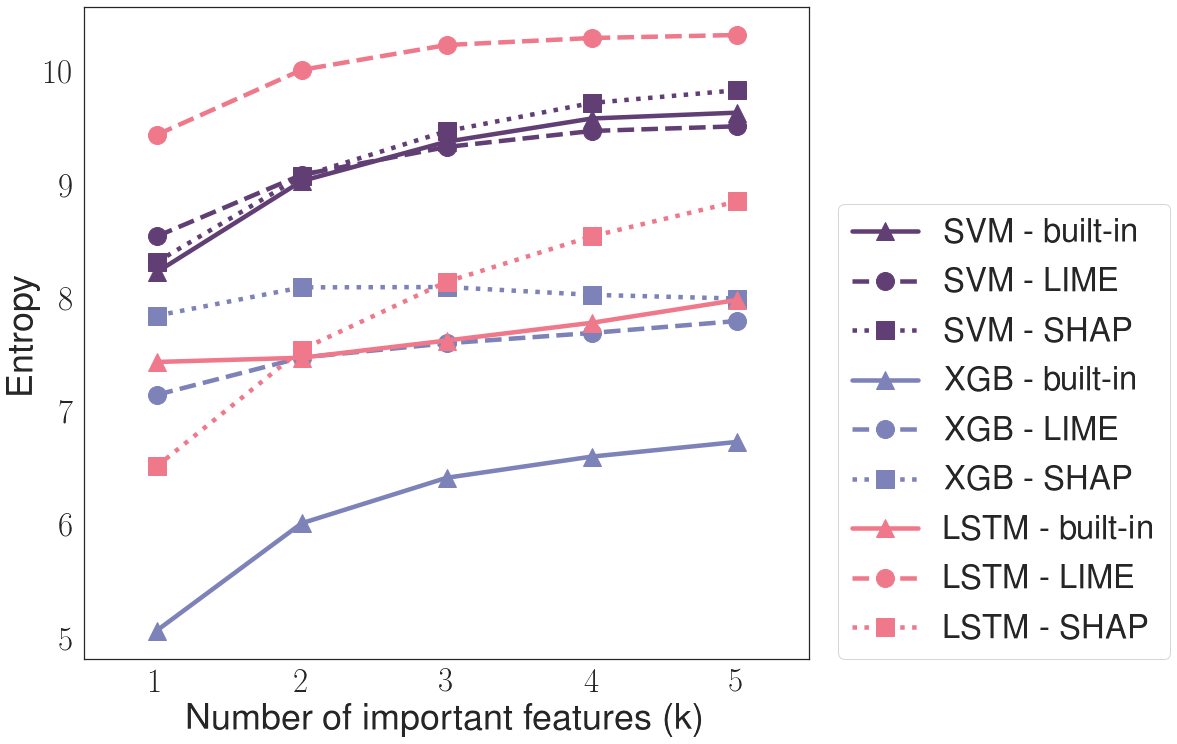

In [98]:
print('=== deception ===')
dist.run_entropy('deception', SAVE_DECEPTION_DIR, k_10_list, models_1, feature_types)
print('=== yelp binary ===')
dist.run_entropy('yelp_binary', SAVE_YELP_DIR, k_10_list, models_1, feature_types)
print('=== sst binary ===')
dist.run_entropy('sst_binary', SAVE_SST_DIR, k_5_list, models_1, feature_types)

### Part-of-speech tag distribution with the built-in method <a id='pos'></a>
[Table of Content](#content)

=== deception ===


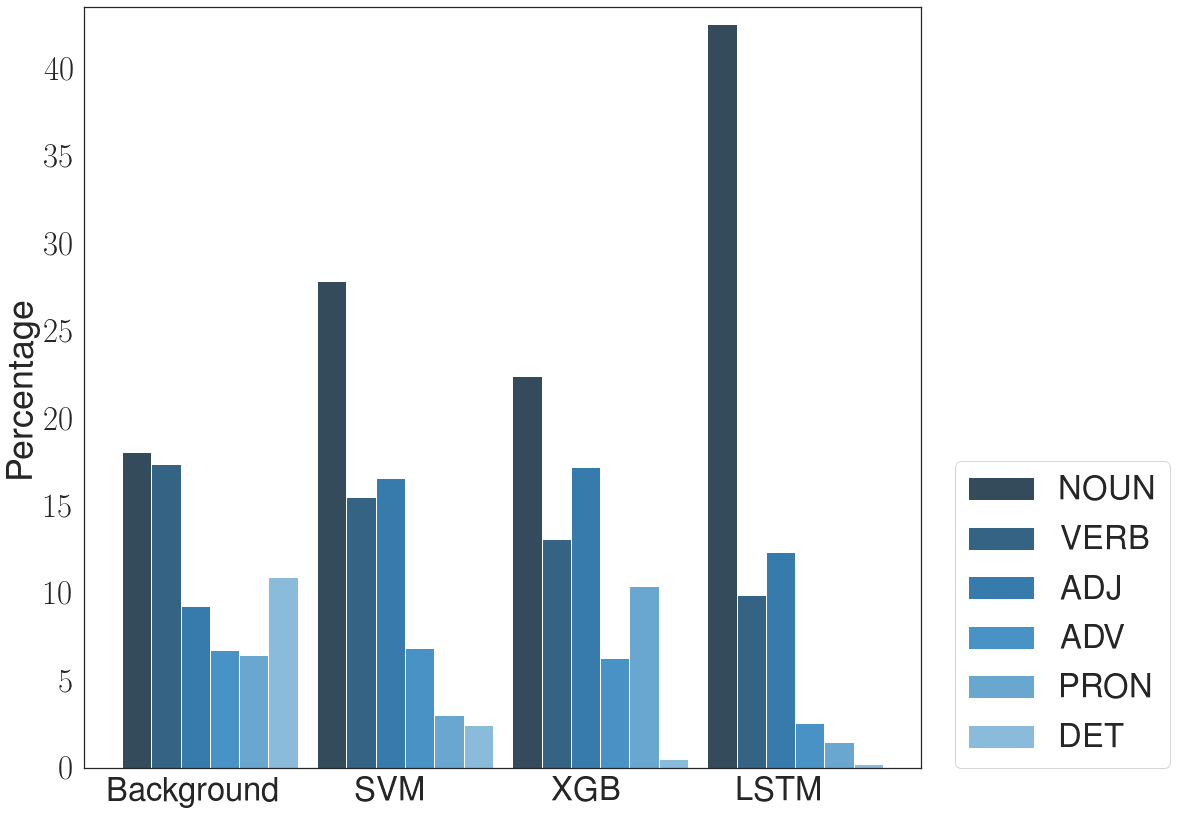

=== yelp binary ===


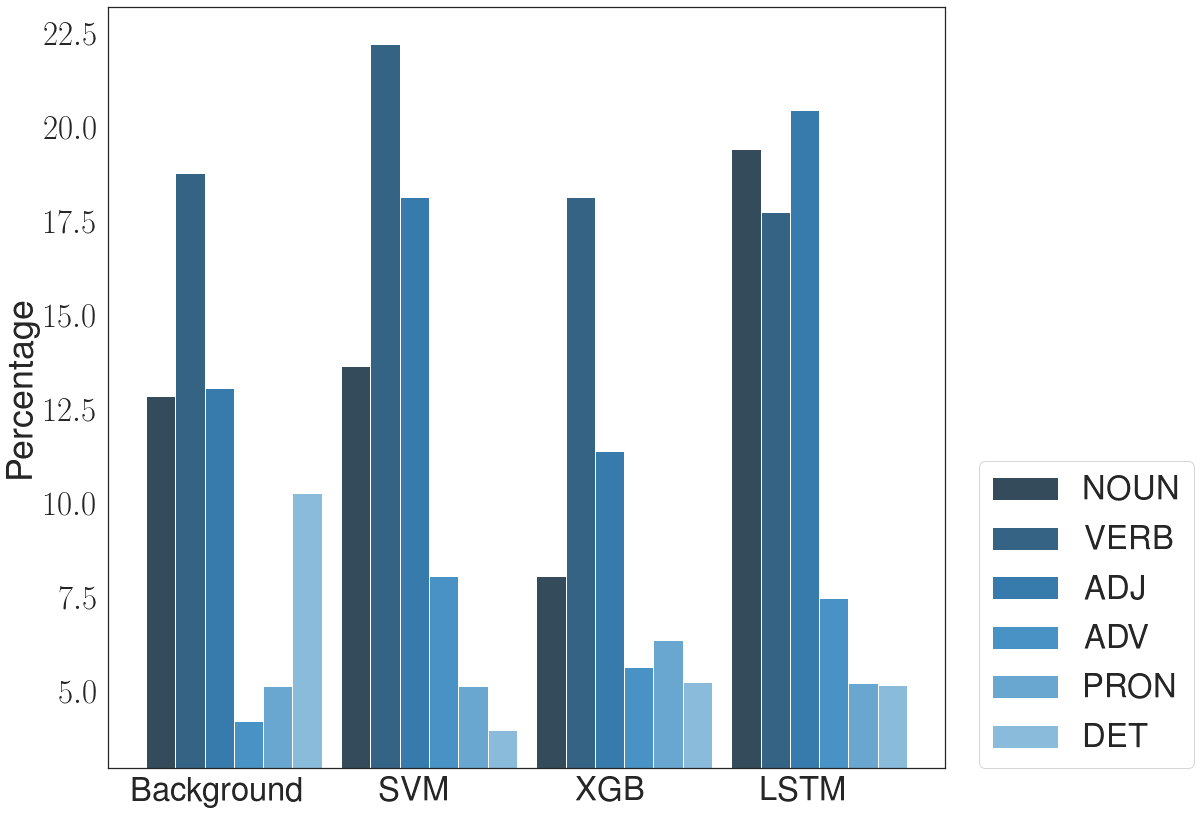

=== sst binary ===


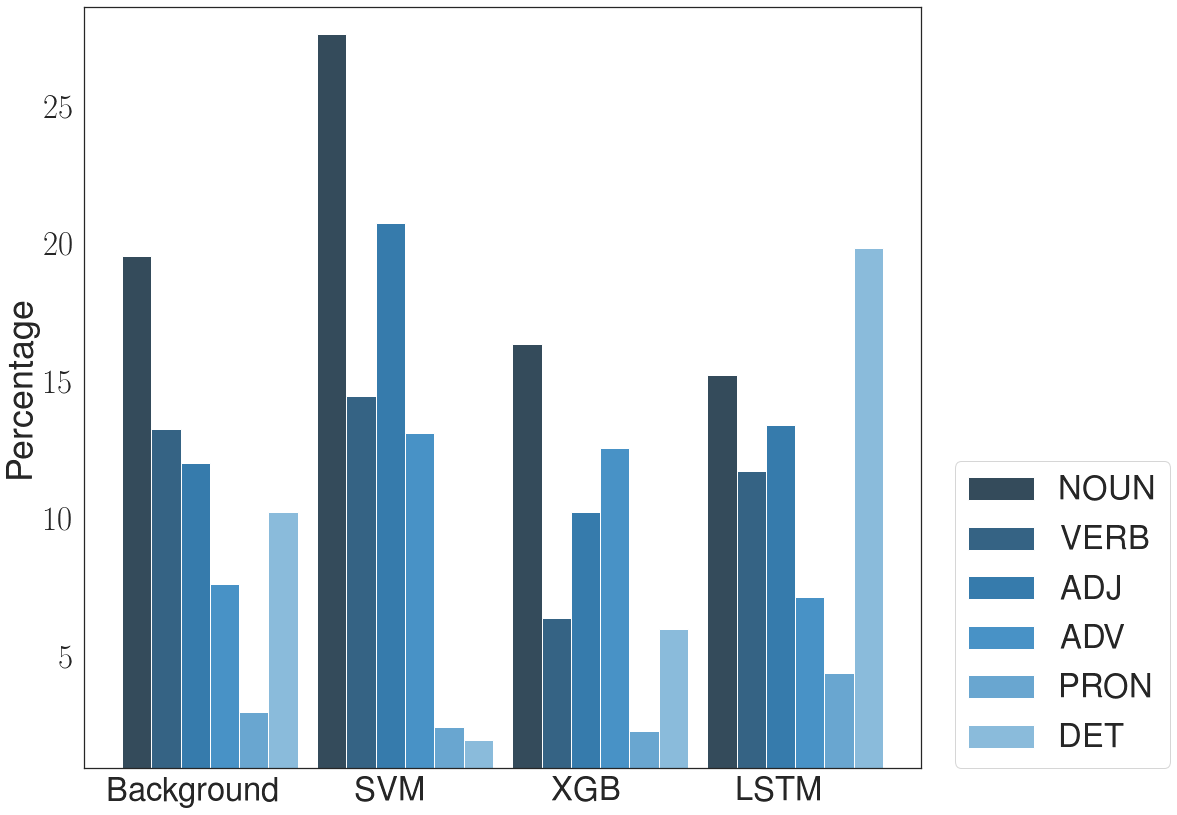

In [78]:
print('=== deception ===')
dist.run_pos_percent('deception', DATA_DECEPTION_DIR, SAVE_DECEPTION_DIR, models_1, ['built_in'], 10)
print('=== yelp binary ===')
dist.run_pos_percent('yelp_binary', DATA_YELP_DIR, SAVE_YELP_DIR, models_1, ['built_in'], 10)
print('=== sst binary ===')
dist.run_pos_percent('sst_binary', DATA_SST_DIR, SAVE_SST_DIR, models_1, ['built_in'], 5)

### Distance of the part-of-speech tag distributions between important features and all words <a id='dist-pos'></a>
[Table of Content](#content)

=== deception ===


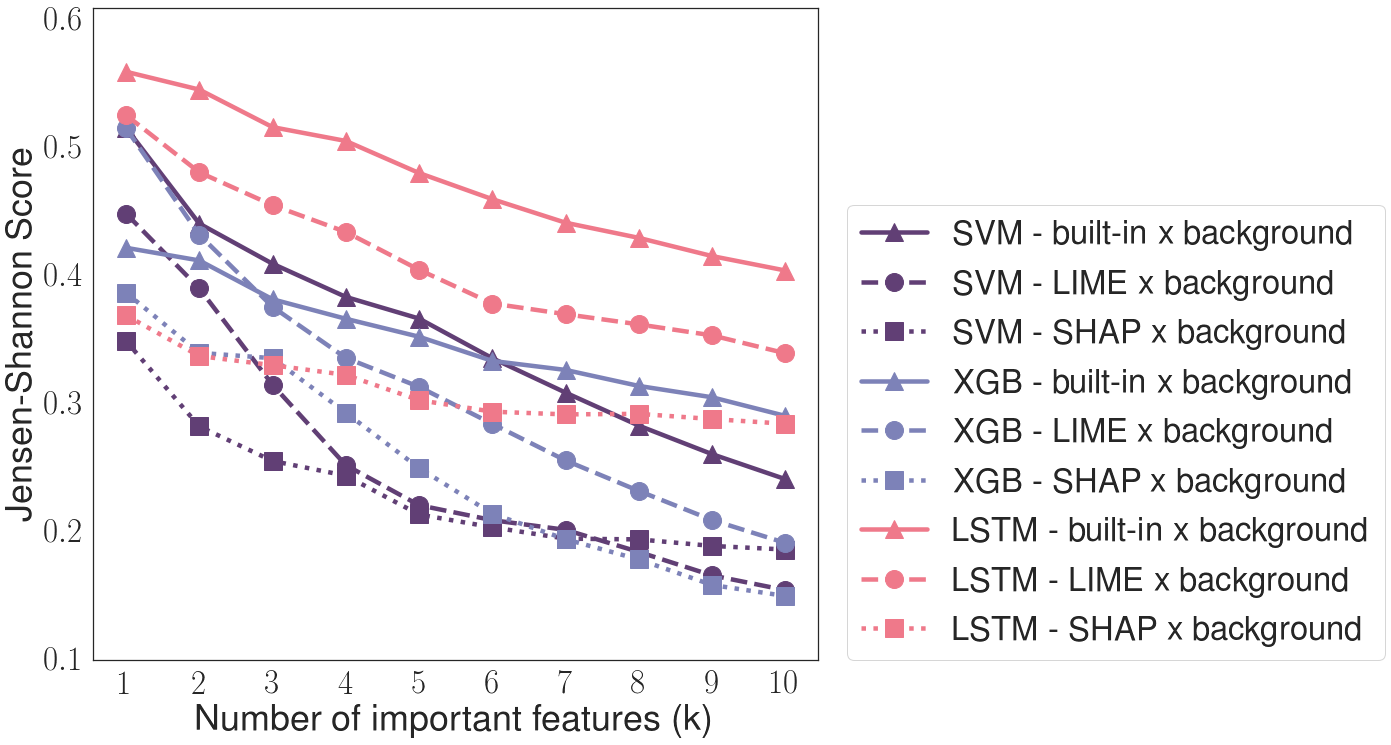

=== yelp binary ===


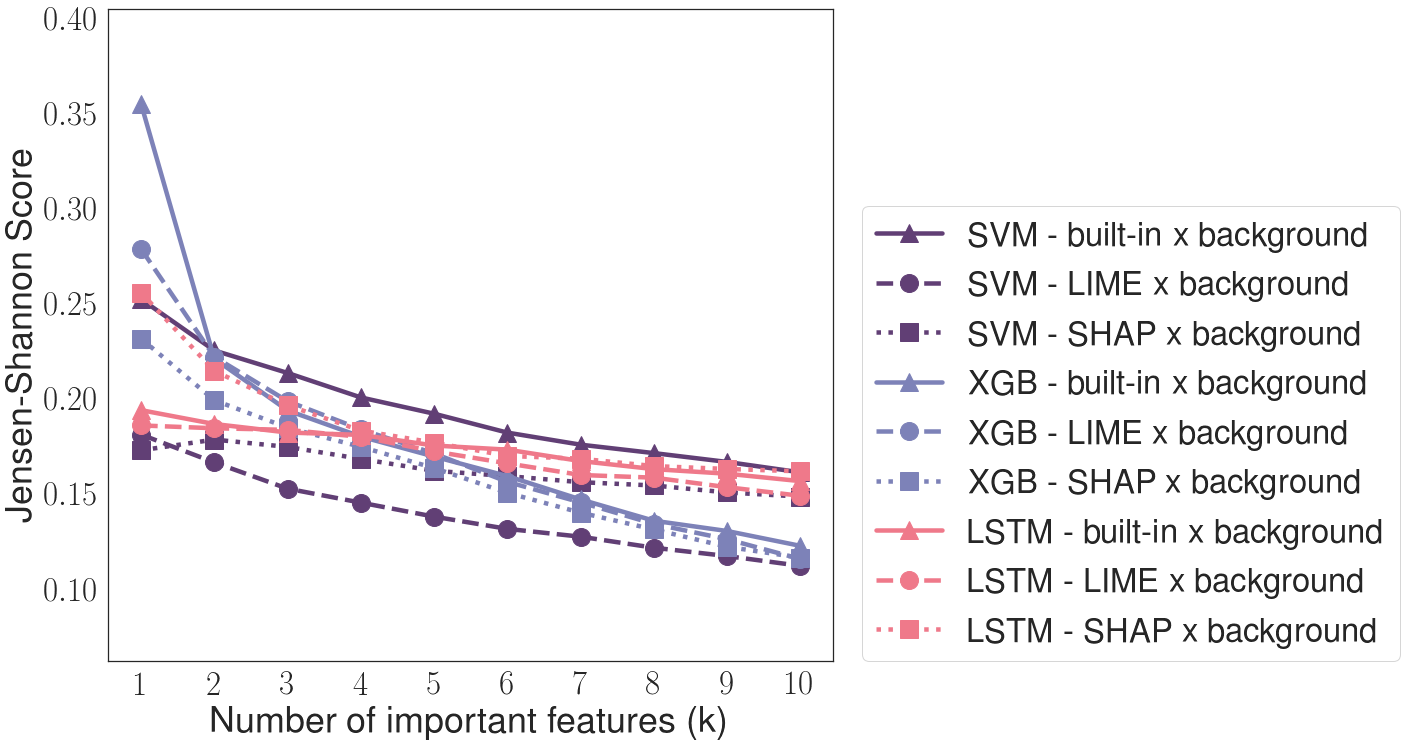

=== sst binary ===


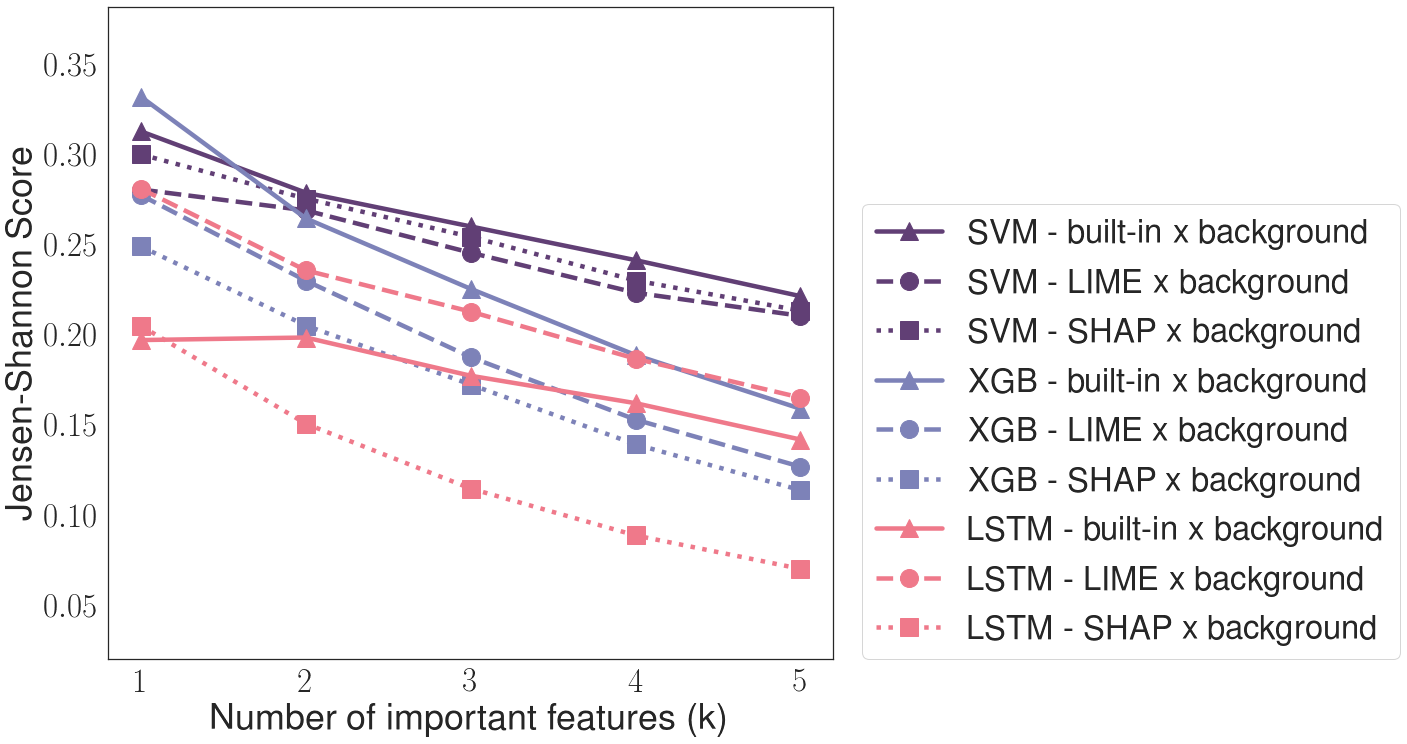

In [99]:
print('=== deception ===')
dist.run_js_pos('deception', DATA_DECEPTION_DIR, SAVE_DECEPTION_DIR, models_1, feature_types, k_10_list)
print('=== yelp binary ===')
dist.run_js_pos('yelp_binary', DATA_YELP_DIR, SAVE_YELP_DIR, models_1, feature_types, k_10_list)
print('=== sst binary ===')
dist.run_js_pos('sst_binary', DATA_SST_DIR, SAVE_SST_DIR, models_1, feature_types, k_5_list)